### Important Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import math
import squarify
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
df=pd.read_csv('Processed_Flipdata - Processed_Flipdata.csv')

In [4]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [5]:
df.shape

(541, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,541.0,289.711645,182.359185,0.0,135.00,273.00,434.00,642.00
Memory,541.0,110.550832,60.600694,16.0,64.00,128.00,128.00,256.00
RAM,541.0,5.397412,1.984923,2.0,4.00,6.00,8.00,8.00
Battery_,541.0,4871.587800,780.148862,800.0,5000.00,5000.00,5000.00,7000.00
AI Lens,541.0,0.062847,0.242911,0.0,0.00,0.00,0.00,1.00
Mobile Height,541.0,16.431201,2.523553,4.5,16.51,16.71,16.94,41.94


In [8]:
df.describe(exclude=['number']).T
# Exclude numerical column and summarize the categorical column. 

,count,unique,top,freq
Model,541,187,vivo Y16,9
Colour,541,275,Yellow,12
Rear Camera,541,14,50MP,260
Front Camera,541,13,16MP,164
Processor_,541,123,Qualcomm Snapdragon 680,33
Prize,541,158,"15,999",23


In [9]:
df.nunique()

Unnamed: 0       541
Model            187
Colour           275
Memory             5
RAM                5
Battery_          37
Rear Camera       14
Front Camera      13
AI Lens            2
Mobile Height     38
Processor_       123
Prize            158
dtype: int64

In [10]:
df.dtypes

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

### Checking Null Values

In [12]:
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [13]:
print(df.isna().sum())

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


In [14]:
missing_rows = df[df['Prize'].isna()]
print(missing_rows)

Empty DataFrame
Columns: [Unnamed: 0, Model, Colour, Memory, RAM, Battery_, Rear Camera, Front Camera, AI Lens, Mobile Height, Processor_, Prize]
Index: []


In [15]:
df['Prize'] = df['Prize'].astype(str).str.replace(',', '').astype(float).astype('Int64')

In [16]:
df['Prize'] = df['Prize'].fillna(df['Prize'].median())  # Use median price

In [17]:
df.isna().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [18]:
float_cols = ['Memory', 'RAM', 'Battery_', 'Mobile Height','Prize']
df[float_cols] = df[float_cols].astype(int)

In [19]:
df.dtypes

Unnamed: 0        int64
Model            object
Colour           object
Memory            int32
RAM               int32
Battery_          int32
Rear Camera      object
Front Camera     object
AI Lens           int64
Mobile Height     int32
Processor_       object
Prize             int32
dtype: object

### Drop the unnamed column

In [21]:
df=df.copy()

# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)

# Verify
print(df.head())

             Model        Colour  Memory  RAM  Battery_ Rear Camera  \
0  Infinix SMART 7   Night Black      64    4      6000        13MP   
1  Infinix SMART 7    Azure Blue      64    4      6000        13MP   
2     MOTOROLA G32  Mineral Gray     128    8      5000        50MP   
3         POCO C50    Royal Blue      32    2      5000         8MP   
4  Infinix HOT 30i      Marigold     128    8      5000        50MP   

  Front Camera  AI Lens  Mobile Height                  Processor_  Prize  
0          5MP        1             16  Unisoc Spreadtrum SC9863A1   7299  
1          5MP        1             16  Unisoc Spreadtrum SC9863A1   7299  
2         16MP        0             16     Qualcomm Snapdragon 680  11999  
3          5MP        0             16          Mediatek Helio A22   5649  
4          5MP        1             16                         G37   8999  


In [22]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16,"Exynos 1380, Octa Core",38999


# EDA

## Dividing Columns into 
##### 1. **Numerical Columns**
##### 2. **Categorical Columns**

## 1. Numerical Column

In [26]:
numerical_column=df.select_dtypes(include=['int']).columns
numerical_column

Index(['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize'], dtype='object')

<Axes: ylabel='count'>

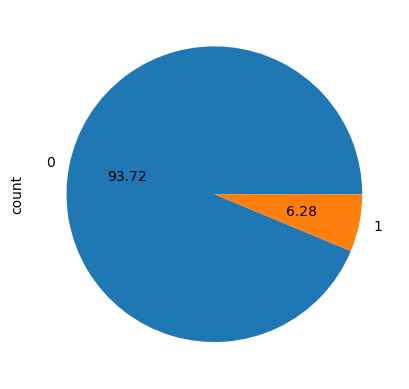

In [27]:
df['AI Lens'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

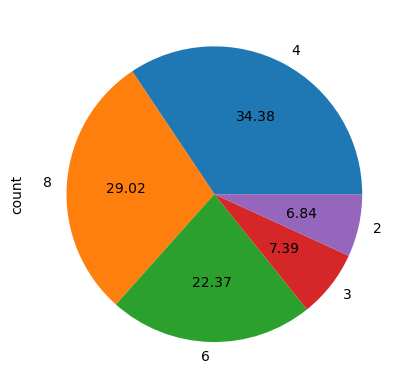

In [28]:
df['RAM'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

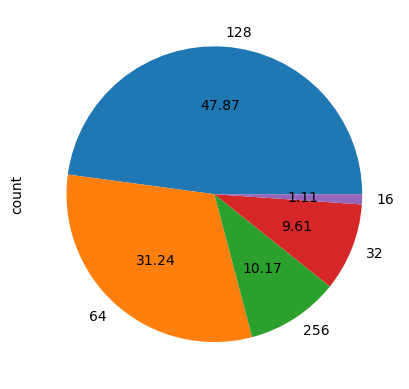

In [29]:
df['Memory'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='Battery_'>

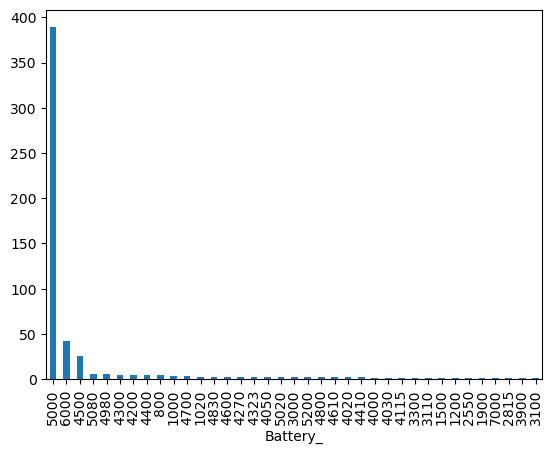

In [30]:
df['Battery_'].value_counts().plot(kind='bar')

In [31]:
print("The numerical columns:", len(numerical_column))

The numerical columns: 6


### Numerical columns are divided into
#### 1.**Discrete**
#### 2.**Continuous**

In [33]:
#numerical_column = df.select_dtypes(include=['float64', 'int64']).columns
#print("The Discrete feature Count:", len(discrete_feature))

In [34]:
#numerical_column = df1.select_dtypes(include=['float64', 'int64']).columns
#print("Continuous feature Count:", len(continuous_feature))

## 2.Categorical Column

In [36]:
categorical_column= df.select_dtypes(include=['object','float64'])
categorical_column

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37
...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2
537,LAVA Z21,Cyan,5MP,2MP,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core"


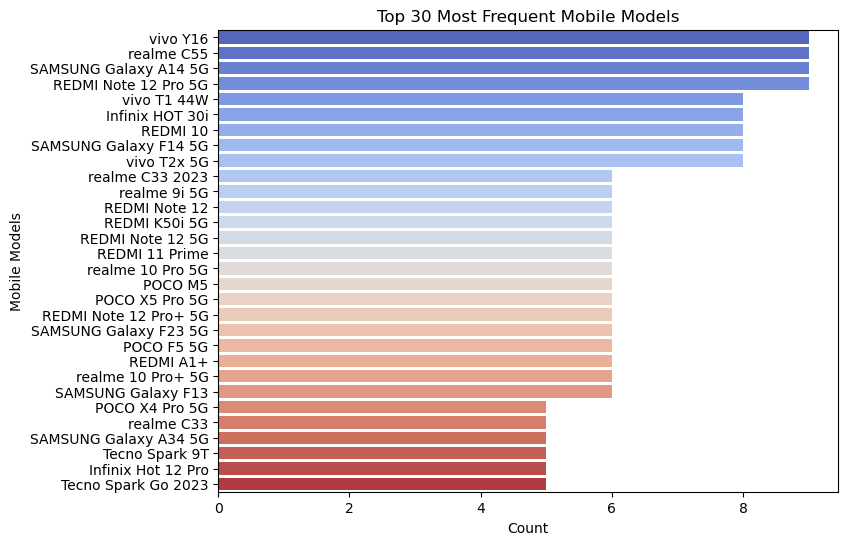

In [37]:
top_models = df["Model"].value_counts().nlargest(30)
plt.figure(figsize=(8, 6)) 
sns.barplot(y=top_models.index, x=top_models.values, palette="coolwarm")
plt.ylabel("Mobile Models") 
plt.xlabel("Count")
plt.title("Top 30 Most Frequent Mobile Models")
plt.show()

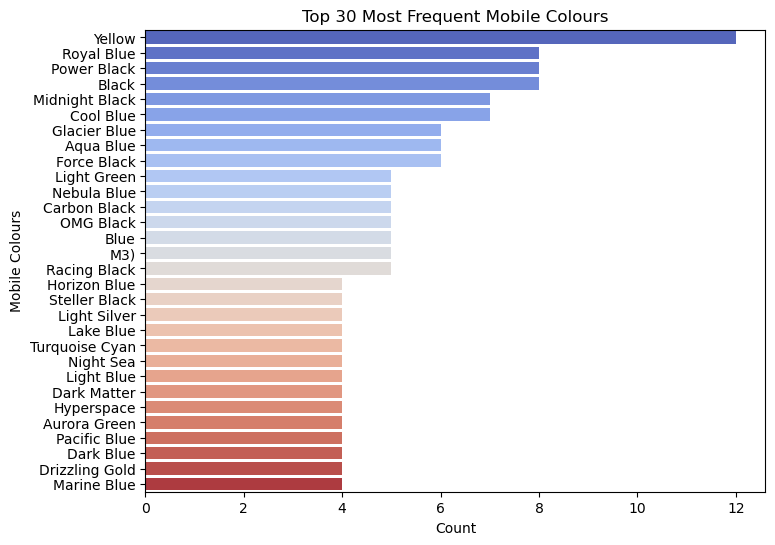

In [38]:
top_models = df["Colour"].value_counts().nlargest(30)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_models.index, x=top_models.values, palette="coolwarm")
plt.ylabel("Mobile Colours") 
plt.xlabel("Count") 
plt.title("Top 30 Most Frequent Mobile Colours")
plt.show()

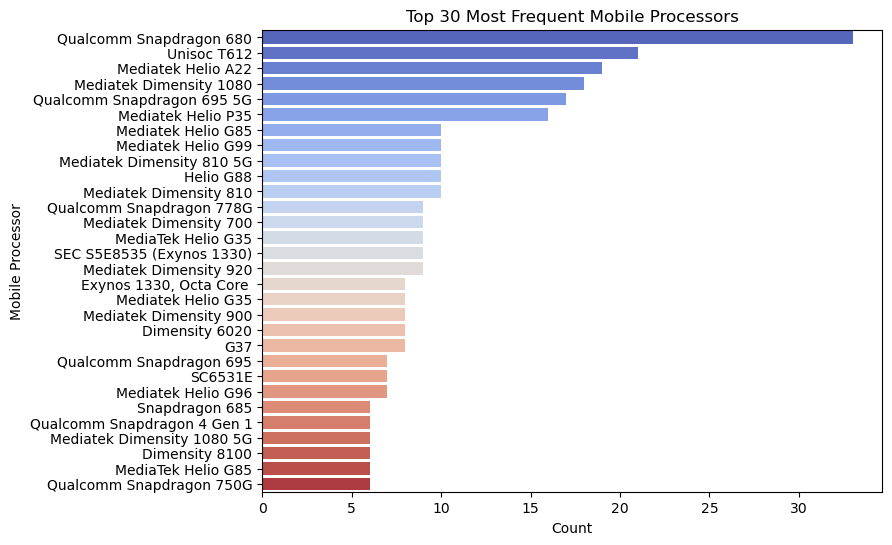

In [39]:
top_models = df["Processor_"].value_counts().nlargest(30)
plt.figure(figsize=(8, 6))  
sns.barplot(y=top_models.index, x=top_models.values, palette="coolwarm")
plt.ylabel("Mobile Processor") 
plt.xlabel("Count")  
plt.title("Top 30 Most Frequent Mobile Processors")
plt.show()

<Axes: xlabel='Rear Camera'>

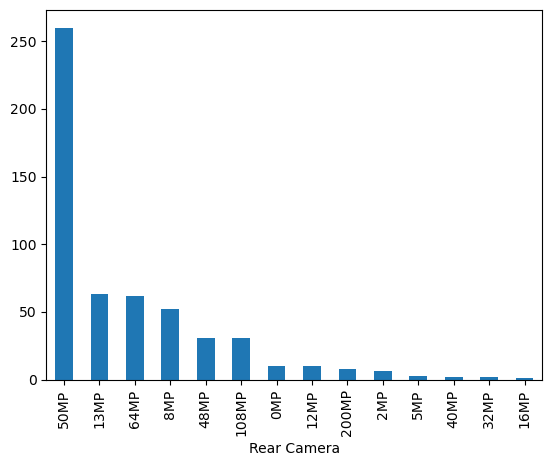

In [40]:
df['Rear Camera'].value_counts().plot(kind='bar')

<Axes: xlabel='Front Camera'>

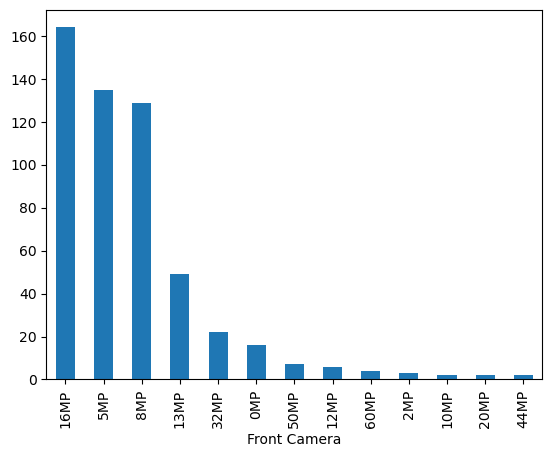

In [41]:
df['Front Camera'].value_counts().plot(kind='bar')

#### This graph shows that as megapixel of front camera increase the sell of the mobile phone decreases because the price of mobile phone increases.

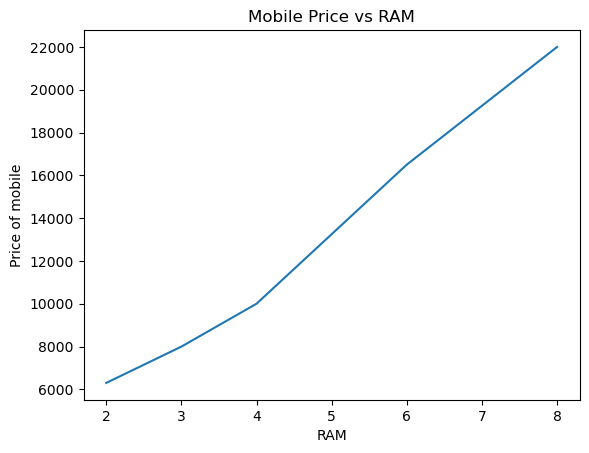

In [43]:
df.groupby('RAM')['Prize'].median().plot()
plt.xlabel('RAM')
plt.ylabel('Price of mobile')
plt.title("Mobile Price vs RAM")
plt.show()

#### This graph shows that as RAM increases the Price of Mobile Phone also increases

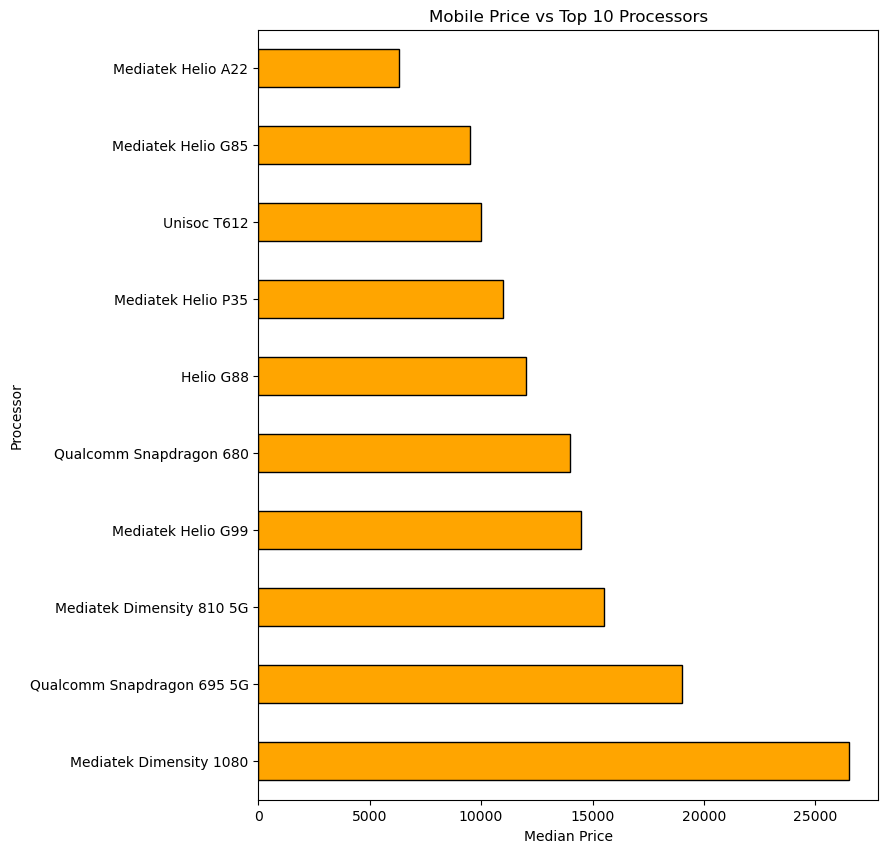

In [45]:
top_processors = df["Processor_"].value_counts().nlargest(10).index
filtered_df = df[df["Processor_"].isin(top_processors)]
median_prices = filtered_df.groupby("Processor_")["Prize"].median()
plt.figure(figsize=(8, 10))  
median_prices.sort_values().plot(kind="barh", color='Orange', edgecolor="black")
plt.ylabel("Processor") 
plt.xlabel("Median Price")
plt.title("Mobile Price vs Top 10 Processors")
plt.gca().invert_yaxis() 
plt.show()

#### This graph shows the top 10 processor and out of these processor the price of Mediatek Dimensity 1080 is more than 25000

## Finding Outliers

In [48]:
numerical_column = df.select_dtypes(include=['number']).columns
for i in numerical_column:
    Q1 = df[i].quantile(0.25)
    print("The first quantile for the column", i, "is given by", Q1)
    Q2 = df[i].quantile(0.50)
    print("The second quantile for the column", i, "is given by", Q2)
    Q3 = df[i].quantile(0.75)
    print("The third quantile for the column", i, "is given by", Q3)
    IQR = Q3 - Q1
    print("The interquartile range for the column", i, "is given by", IQR)
    LL = Q1 - 1.5 * IQR
    print("The lower limit for the column", i, "is given by", LL)
    UL = Q3 + 1.5 * IQR
    print("The upper limit for the column", i, "is given by", UL)
    n = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print("The number of outliers for column", i, "is given by", n)
    df[i] = np.where((df[i] < LL) | (df[i] > UL), df[i].mean(), df[i])
    m = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print("The number of outliers after imputation for column", i, "is given by", m)
    print("   ")
    print("   ")

The first quantile for the column Memory is given by 64.0
The second quantile for the column Memory is given by 128.0
The third quantile for the column Memory is given by 128.0
The interquartile range for the column Memory is given by 64.0
The lower limit for the column Memory is given by -32.0
The upper limit for the column Memory is given by 224.0
The number of outliers for column Memory is given by 55
The number of outliers after imputation for column Memory is given by 0
   
   
The first quantile for the column RAM is given by 4.0
The second quantile for the column RAM is given by 6.0
The third quantile for the column RAM is given by 8.0
The interquartile range for the column RAM is given by 4.0
The lower limit for the column RAM is given by -2.0
The upper limit for the column RAM is given by 14.0
The number of outliers for column RAM is given by 0
The number of outliers after imputation for column RAM is given by 0
   
   
The first quantile for the column Battery_ is given by 50

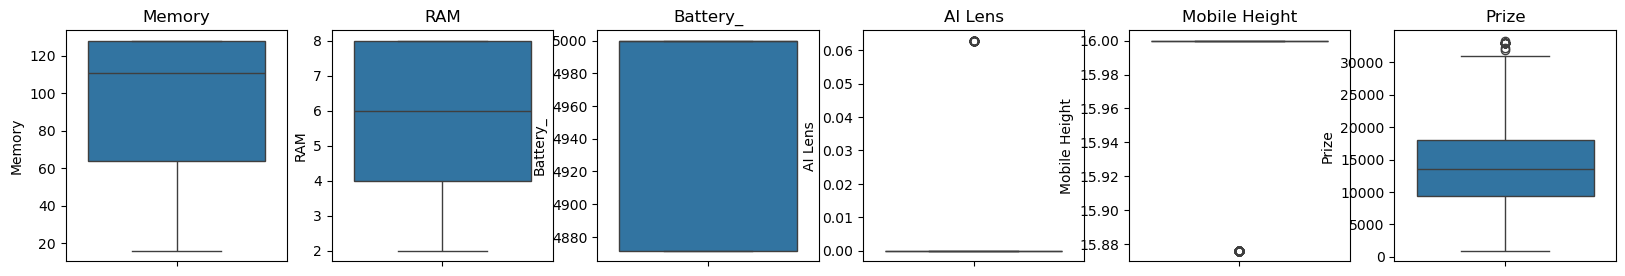

In [49]:
numerical = df.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Ensure correct row calculation
plt.figure(figsize=(20, num_rows * 3)) 
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

## Removing Outliers

In [51]:
from scipy.stats.mstats import winsorize
outlier_columns = ['Prize',]
def winsorize_outliers(df, columns, limit=0.05):
    df_clean = df.copy()
    for col in columns:
        df_clean[col] = winsorize(df_clean[col], limits=[limit, limit])
    return df_clean
df_clean = winsorize_outliers(df, outlier_columns)
print(df_clean[outlier_columns].describe())

              Prize
count    541.000000
mean   14708.444327
std     6723.462301
min     5999.000000
25%     9290.000000
50%    13499.000000
75%    17999.000000
max    29999.000000


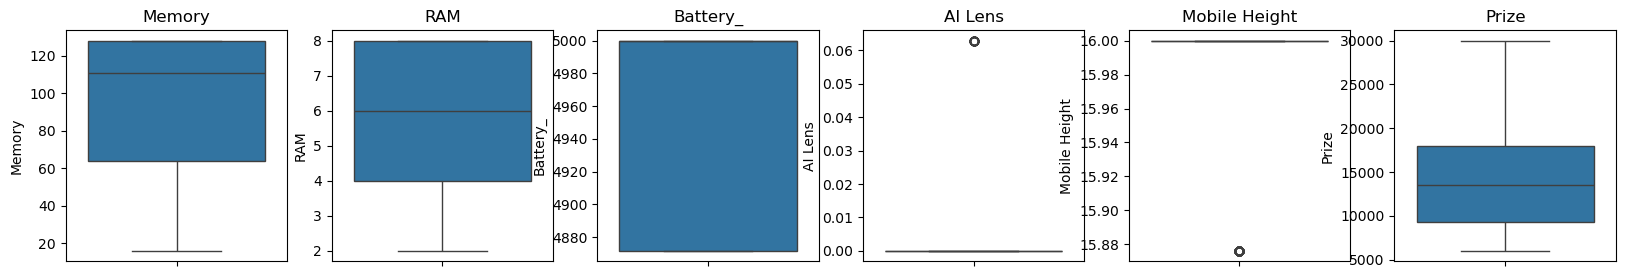

In [52]:
numerical = df_clean.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Ensure correct row calculation
plt.figure(figsize=(20, num_rows * 3)) 
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df_clean[col])
    plt.title(col)

## Skewness

In [54]:
# list of numerical columns whose data type is not object'o'
num_column=df.select_dtypes(include=['float64','int64','int32']).columns

skewness = df[num_column].skew()

# Print skewness for each numerical column
print(skewness)

Memory          -0.519820
RAM              0.067617
Battery_        -0.977369
AI Lens          3.612638
Mobile Height   -1.422606
Prize            0.744972
dtype: float64


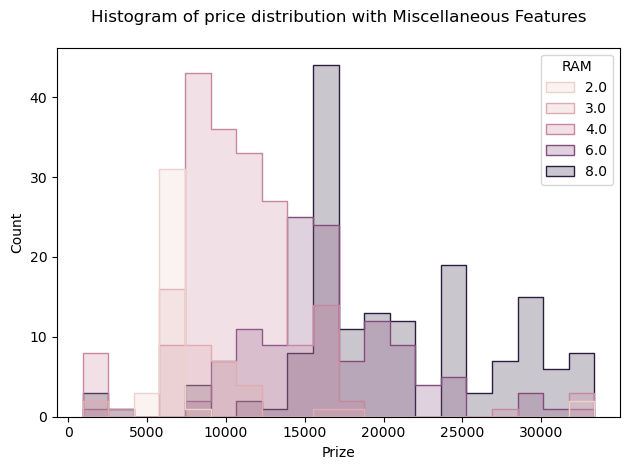

In [55]:
sns.histplot(data=df,x='Prize', bins = 20,hue = 'RAM',element='step')
plt.title('Histogram of price distribution with Miscellaneous Features\n')
plt.tight_layout()
plt.show()

## Key Insights from the Histogram:

### 1.Price Distribution

#### **The majority of mobile phones are priced between ₹5,000 to ₹20,000, with fewer models beyond ₹25,000.**
#### **The distribution is right-skewed, meaning most phones are in the mid-to-low price range, while high-end models are less frequent.**

### 2.Impact of RAM on Price

#### **Lower RAM models (2GB, 3GB, 4GB) are more frequent in the lower price range (₹5,000 - ₹15,000).**
#### **Higher RAM models (6GB, 8GB) are more concentrated in the premium price segment (₹15,000 - ₹30,000+).**
#### **The presence of high-RAM devices in lower price ranges is minimal, suggesting RAM is a key factor in determining price.**

### 3.Clustering of Prices

### **There are distinct peaks, indicating certain price points where most models are available.**
### **The highest count is seen around ₹10,000 - ₹15,000, likely representing budget and mid-range smartphones.**

### Conclusion:
#### ✅**RAM strongly influences price—higher RAM models are priced higher.**
#### ✅ **Most phones are within the affordable to mid-range segment (₹5,000 - ₹20,000).**
#### ✅ **The price distribution is skewed, with fewer high-end models available.**

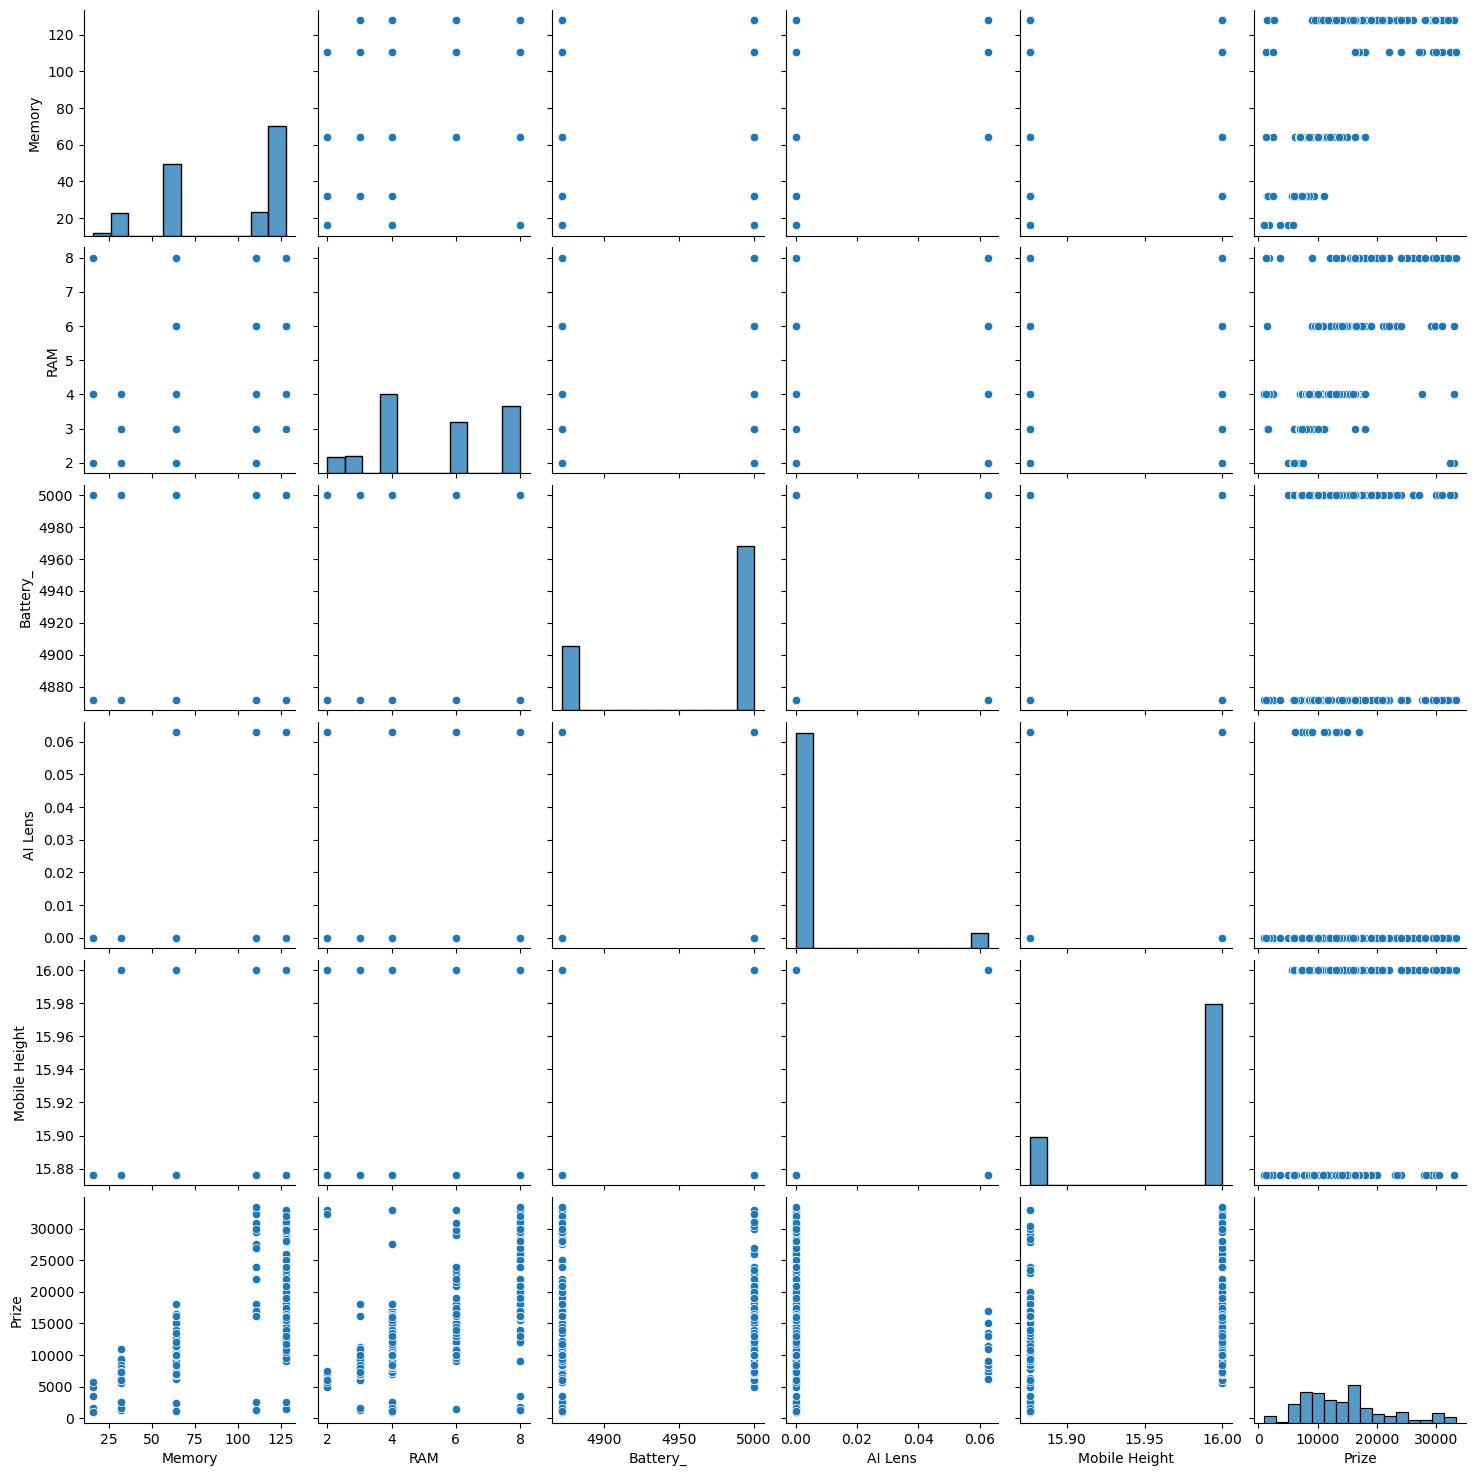

<Figure size 640x480 with 0 Axes>

In [57]:
sns.pairplot(df[['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize']])
plt.show()
plt.suptitle('Pairplot: Relationships Between Features and Mobile Prices', y=1.02)
plt.show()

                 Memory       RAM  Battery_   AI Lens  Mobile Height     Prize
Memory         1.000000  0.727123 -0.123574 -0.113998       0.016747  0.626814
RAM            0.727123  1.000000 -0.171280 -0.082622      -0.106724  0.657876
Battery_      -0.123574 -0.171280  1.000000 -0.024526       0.292139 -0.180244
AI Lens       -0.113998 -0.082622 -0.024526  1.000000      -0.127661 -0.175875
Mobile Height  0.016747 -0.106724  0.292139 -0.127661       1.000000  0.094997
Prize          0.626814  0.657876 -0.180244 -0.175875       0.094997  1.000000


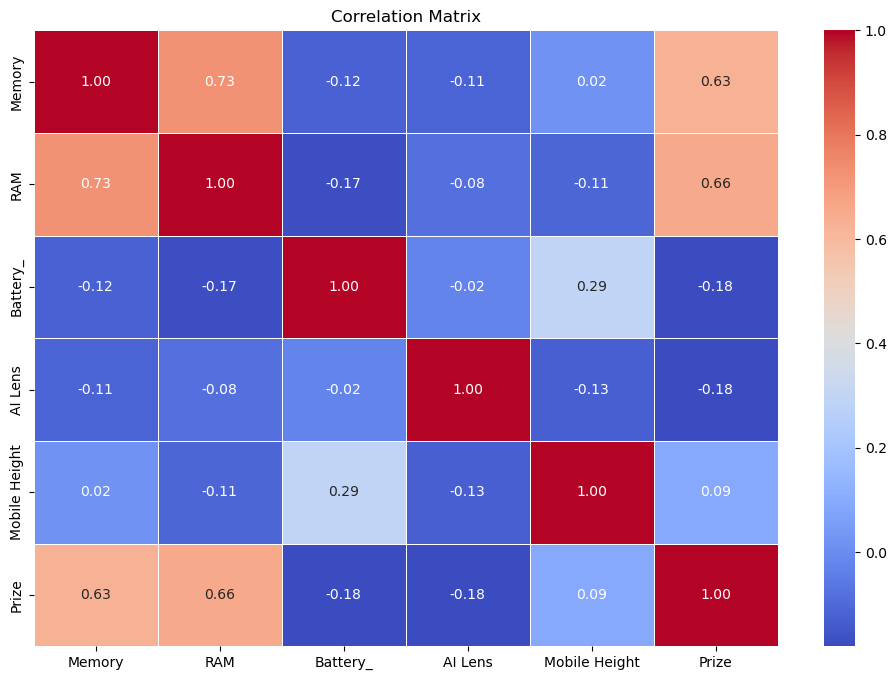

In [58]:
numerical_df = df.select_dtypes(include=['number'])  # Keeps only numeric columns

# Compute correlation matrix
corr = numerical_df.corr()

# Display correlation values
print(corr)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

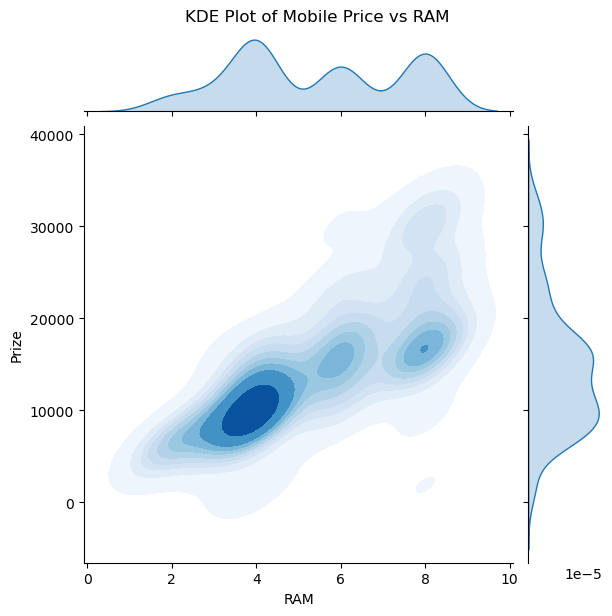

In [59]:
sns.jointplot(x='RAM', y='Prize', data=df, kind='kde', fill=True, cmap='Blues')

# Set the title for the plot
plt.suptitle('KDE Plot of Mobile Price vs RAM', y=1.02)
plt.show()


## Key Insights from the KDE Plot (RAM vs Mobile Price)

#### **1.Positive Correlation Between RAM and Price**
##### **The KDE plot shows that as RAM increases, the mobile price also tends to increase.**
##### **This suggests that higher RAM models are generally priced higher.**

#### **2.High-Density Region**
##### **The darkest region (highest density) is around 2GB to 4GB RAM and price between 5,000 to 15,000.**
##### **This indicates that most mobile phones fall within this range, making it the most common segment in the dataset.**

#### **3.Less Density in Higher RAM & Price**
##### **As RAM increases beyond 6GB-8GB, the distribution spreads out, meaning fewer phones have very high RAM and those that do are priced higher.However, the density is lower for very high-end devices, suggesting that flagship models (high RAM & price) are less frequent.**

#### **4.Price Variability at Lower RAM**
##### **At lower RAM values (0GB - 2GB), the price distribution spreads widely, meaning there are both budget and slightly expensive models in this category.This suggests that other features (brand, processor, etc.) might also play a role in determining price at lower RAM levels.**

Text(0.5, 1.0, 'Memory Distribution')

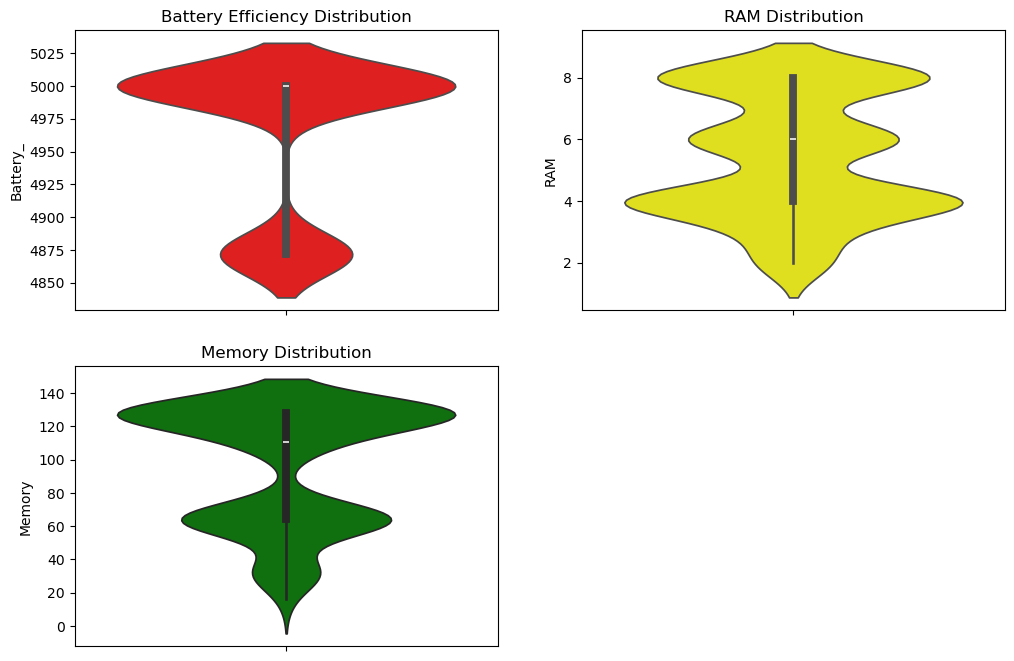

In [61]:
plt.figure(figsize=(12, 8))

# Violin Plot: Battery Efficiency
plt.subplot(2, 2, 1)
sns.violinplot(y=df['Battery_'], color='red')
plt.title('Battery Efficiency Distribution')

# Violin Plot: RAM
plt.subplot(2, 2, 2)
sns.violinplot(y=df['RAM'], color='yellow')
plt.title('RAM Distribution')

# Violin Plot: Price Per RAM
plt.subplot(2, 2, 3)
sns.violinplot(y=df['Memory'], color='green')
plt.title('Memory Distribution')


## Key Insights from the Violin Plots

#### **1. Battery Efficiency Distribution (Red)**
##### **The distribution appears bimodal (two peaks), indicating two common ranges of battery efficiency.**
##### **The middle part is relatively narrow, meaning most values cluster around a certain range.**
##### **There are some outliers at the lower end, suggesting a few mobile phones with significantly lower battery efficiency.**

#### **2. RAM Distribution (Yellow)**
##### **The plot is multi-modal, meaning there are distinct groups of RAM capacities.**
##### **The wider sections indicate more common RAM values (e.g., 4GB, 6GB, 8GB).**
##### **The lower part of the violin is narrow, meaning fewer low-RAM devices in the dataset.**

#### **3. Memory Distribution (Green)**
##### **The plot has two distinct peaks, indicating that mobile phones tend to have two common memory capacity ranges (possibly lower-end and higher-end models).**
##### **This suggests that most phones either have low or high memory, with fewer in the middle range.**

In [63]:
df['Rear_Camera_MP'] = df['Rear Camera'].str.replace('MP', '').astype(int)
df['Front_Camera_MP'] = df['Front Camera'].str.replace('MP', '').astype(int)
print(df[['Rear Camera', 'Front Camera', 'RAM']])

    Rear Camera Front Camera  RAM
0          13MP          5MP  4.0
1          13MP          5MP  4.0
2          50MP         16MP  8.0
3           8MP          5MP  2.0
4          50MP          5MP  8.0
..          ...          ...  ...
536        50MP         12MP  8.0
537         5MP          2MP  2.0
538        50MP          8MP  4.0
539        50MP         32MP  8.0
540        50MP          8MP  4.0

[541 rows x 3 columns]


## Feature Engineering

In [65]:
df['price_per_ram'] = df['Prize'] / df['RAM']
df['price_per_memory'] = df['Prize'] / df['Memory']

In [66]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Rear_Camera_MP,Front_Camera_MP,price_per_ram,price_per_memory
0,Infinix SMART 7,Night Black,64.000000,4.0,4871.5878,13MP,5MP,0.062847,16.000000,Unisoc Spreadtrum SC9863A1,7299.000000,13,5,1824.750000,114.046875
1,Infinix SMART 7,Azure Blue,64.000000,4.0,4871.5878,13MP,5MP,0.062847,16.000000,Unisoc Spreadtrum SC9863A1,7299.000000,13,5,1824.750000,114.046875
2,MOTOROLA G32,Mineral Gray,128.000000,8.0,5000.0000,50MP,16MP,0.000000,16.000000,Qualcomm Snapdragon 680,11999.000000,50,16,1499.875000,93.742188
3,POCO C50,Royal Blue,32.000000,2.0,5000.0000,8MP,5MP,0.000000,16.000000,Mediatek Helio A22,5649.000000,8,5,2824.500000,176.531250
4,Infinix HOT 30i,Marigold,128.000000,8.0,5000.0000,50MP,5MP,0.062847,16.000000,G37,8999.000000,50,5,1124.875000,70.304688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,110.550832,8.0,4871.5878,50MP,12MP,0.000000,15.876155,Qualcomm Snapdragon 8 Gen 2,16228.375231,50,12,2028.546904,146.795596
537,LAVA Z21,Cyan,32.000000,2.0,4871.5878,5MP,2MP,0.000000,15.876155,Octa Core,5998.000000,5,2,2999.000000,187.437500
538,Tecno Spark 8T,Turquoise Cyan,64.000000,4.0,5000.0000,50MP,8MP,0.000000,16.000000,MediaTek Helio G35,9990.000000,50,8,2497.500000,156.093750
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128.000000,8.0,5000.0000,50MP,32MP,0.000000,16.000000,"Exynos 1380, Octa Core",16228.375231,50,32,2028.546904,126.784181


In [67]:
df.dtypes

Model                object
Colour               object
Memory              float64
RAM                 float64
Battery_            float64
Rear Camera          object
Front Camera         object
AI Lens             float64
Mobile Height       float64
Processor_           object
Prize               float64
Rear_Camera_MP        int32
Front_Camera_MP       int32
price_per_ram       float64
price_per_memory    float64
dtype: object

In [68]:
print(df.isna().sum())

Model               0
Colour              0
Memory              0
RAM                 0
Battery_            0
Rear Camera         0
Front Camera        0
AI Lens             0
Mobile Height       0
Processor_          0
Prize               0
Rear_Camera_MP      0
Front_Camera_MP     0
price_per_ram       0
price_per_memory    0
dtype: int64


In [69]:
le=LabelEncoder

In [70]:
categorical_cols = ['Model', 'Colour', 'Processor_']  # Update based on your dataset

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

In [71]:
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Rear_Camera_MP,Front_Camera_MP,price_per_ram,price_per_memory
0,23,159,64.000000,4.0,4871.5878,13MP,5MP,0.062847,16.000000,113,7299.000000,13,5,1824.750000,114.046875
1,23,20,64.000000,4.0,4871.5878,13MP,5MP,0.062847,16.000000,113,7299.000000,13,5,1824.750000,114.046875
2,37,149,128.000000,8.0,5000.0000,50MP,16MP,0.000000,16.000000,75,11999.000000,50,16,1499.875000,93.742188
3,69,201,32.000000,2.0,5000.0000,8MP,5MP,0.000000,16.000000,56,5649.000000,8,5,2824.500000,176.531250
4,12,130,128.000000,8.0,5000.0000,50MP,5MP,0.062847,16.000000,14,8999.000000,50,5,1124.875000,70.304688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,110.550832,8.0,4871.5878,50MP,12MP,0.000000,15.876155,89,16228.375231,50,12,2028.546904,146.795596
537,32,52,32.000000,2.0,4871.5878,5MP,2MP,0.000000,15.876155,68,5998.000000,5,2,2999.000000,187.437500
538,123,259,64.000000,4.0,5000.0000,50MP,8MP,0.000000,16.000000,35,9990.000000,50,8,2497.500000,156.093750
539,110,17,128.000000,8.0,5000.0000,50MP,32MP,0.000000,16.000000,11,16228.375231,50,32,2028.546904,126.784181


### Drop some unused columns 

In [73]:
df=df.copy()

# Drop unnecessary columns
columns_to_drop = ['Rear Camera','Front Camera']
df = df.drop(columns=columns_to_drop)

In [74]:
df

,Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Prize,Rear_Camera_MP,Front_Camera_MP,price_per_ram,price_per_memory
0,23,159,64.000000,4.0,4871.5878,0.062847,16.000000,113,7299.000000,13,5,1824.750000,114.046875
1,23,20,64.000000,4.0,4871.5878,0.062847,16.000000,113,7299.000000,13,5,1824.750000,114.046875
2,37,149,128.000000,8.0,5000.0000,0.000000,16.000000,75,11999.000000,50,16,1499.875000,93.742188
3,69,201,32.000000,2.0,5000.0000,0.000000,16.000000,56,5649.000000,8,5,2824.500000,176.531250
4,12,130,128.000000,8.0,5000.0000,0.062847,16.000000,14,8999.000000,50,5,1124.875000,70.304688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,110.550832,8.0,4871.5878,0.000000,15.876155,89,16228.375231,50,12,2028.546904,146.795596
537,32,52,32.000000,2.0,4871.5878,0.000000,15.876155,68,5998.000000,5,2,2999.000000,187.437500
538,123,259,64.000000,4.0,5000.0000,0.000000,16.000000,35,9990.000000,50,8,2497.500000,156.093750
539,110,17,128.000000,8.0,5000.0000,0.000000,16.000000,11,16228.375231,50,32,2028.546904,126.784181


In [75]:
df.dtypes

Model                 int32
Colour                int32
Memory              float64
RAM                 float64
Battery_            float64
AI Lens             float64
Mobile Height       float64
Processor_            int32
Prize               float64
Rear_Camera_MP        int32
Front_Camera_MP       int32
price_per_ram       float64
price_per_memory    float64
dtype: object

                     Model    Colour    Memory       RAM  Battery_   AI Lens  \
Model             1.000000  0.106594  0.077493  0.005924  0.023470 -0.396336   
Colour            0.106594  1.000000  0.083804  0.064503 -0.056670 -0.030308   
Memory            0.077493  0.083804  1.000000  0.727123 -0.123574 -0.113998   
RAM               0.005924  0.064503  0.727123  1.000000 -0.171280 -0.082622   
Battery_          0.023470 -0.056670 -0.123574 -0.171280  1.000000 -0.024526   
AI Lens          -0.396336 -0.030308 -0.113998 -0.082622 -0.024526  1.000000   
Mobile Height     0.171971  0.020505  0.016747 -0.106724  0.292139 -0.127661   
Processor_        0.036362 -0.068677 -0.155173 -0.108733  0.054199 -0.112740   
Prize             0.109488  0.056858  0.626814  0.657876 -0.180244 -0.175875   
Rear_Camera_MP    0.000340  0.053969  0.469595  0.439558 -0.064014 -0.043597   
Front_Camera_MP   0.048434  0.035167  0.433164  0.493861 -0.282394 -0.111779   
price_per_ram     0.110127  0.004092  0.

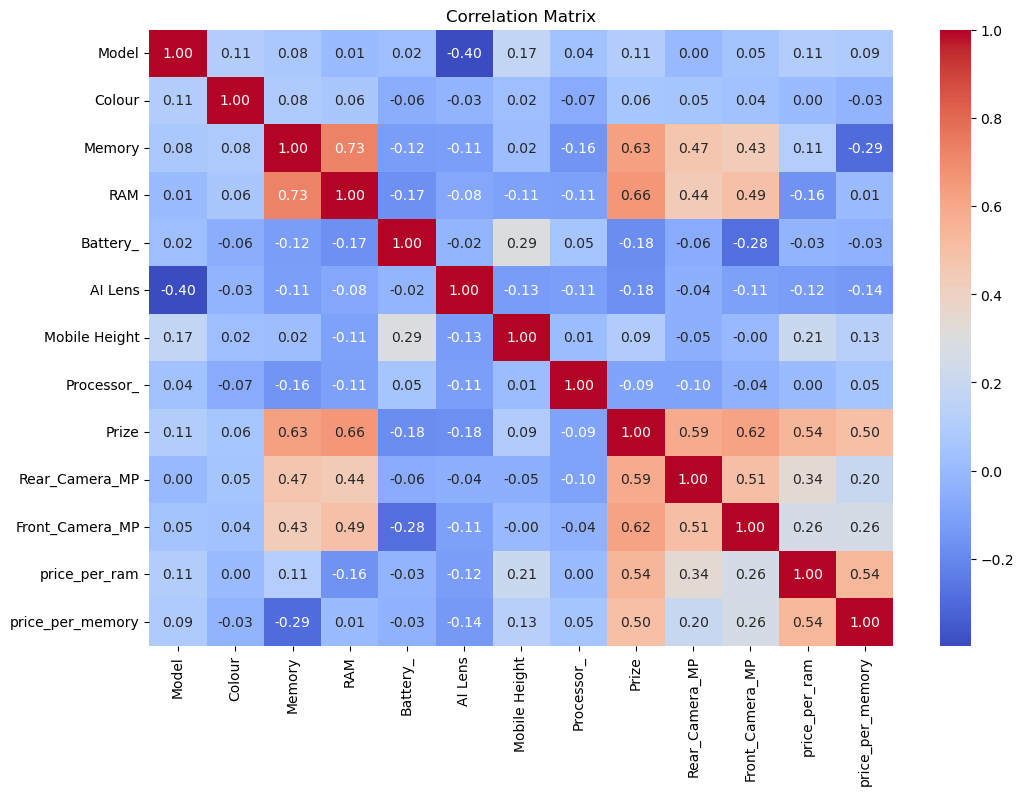

In [76]:
corr = df.corr()
print(corr)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 1.Strong Positive Correlation with Price:

#### **RAM (≈ 0.73): Higher RAM is associated with higher mobile prices.**
#### **Memory (≈ 0.63): More storage leads to a higher price.**
#### **Processor (≈ 0.50): The processor type has a moderate impact on price.**
#### **Rear Camera MP & Front Camera MP (≈ 0.20 - 0.26): Slightly influences price but not as strongly as RAM and storage.**

### 2.Negative or Weak Correlation with Price:

#### **Battery (≈ -0.02): Battery capacity has almost no effect on price.**
#### **AI Lens (≈ -0.14): Very weak negative correlation, meaning AI Lens does not significantly impact price.**
#### **Mobile Height (≈ 0.13): Size has minimal influence on price.**

### 3.Inter-Feature Correlation:

#### **RAM & Memory (≈ 0.73): Higher RAM is often found in phones with higher storage.**
#### **Price per RAM & Price per Memory (≈ 0.54 - 0.56): Indicates how price distribution varies per unit of RAM and storage.**

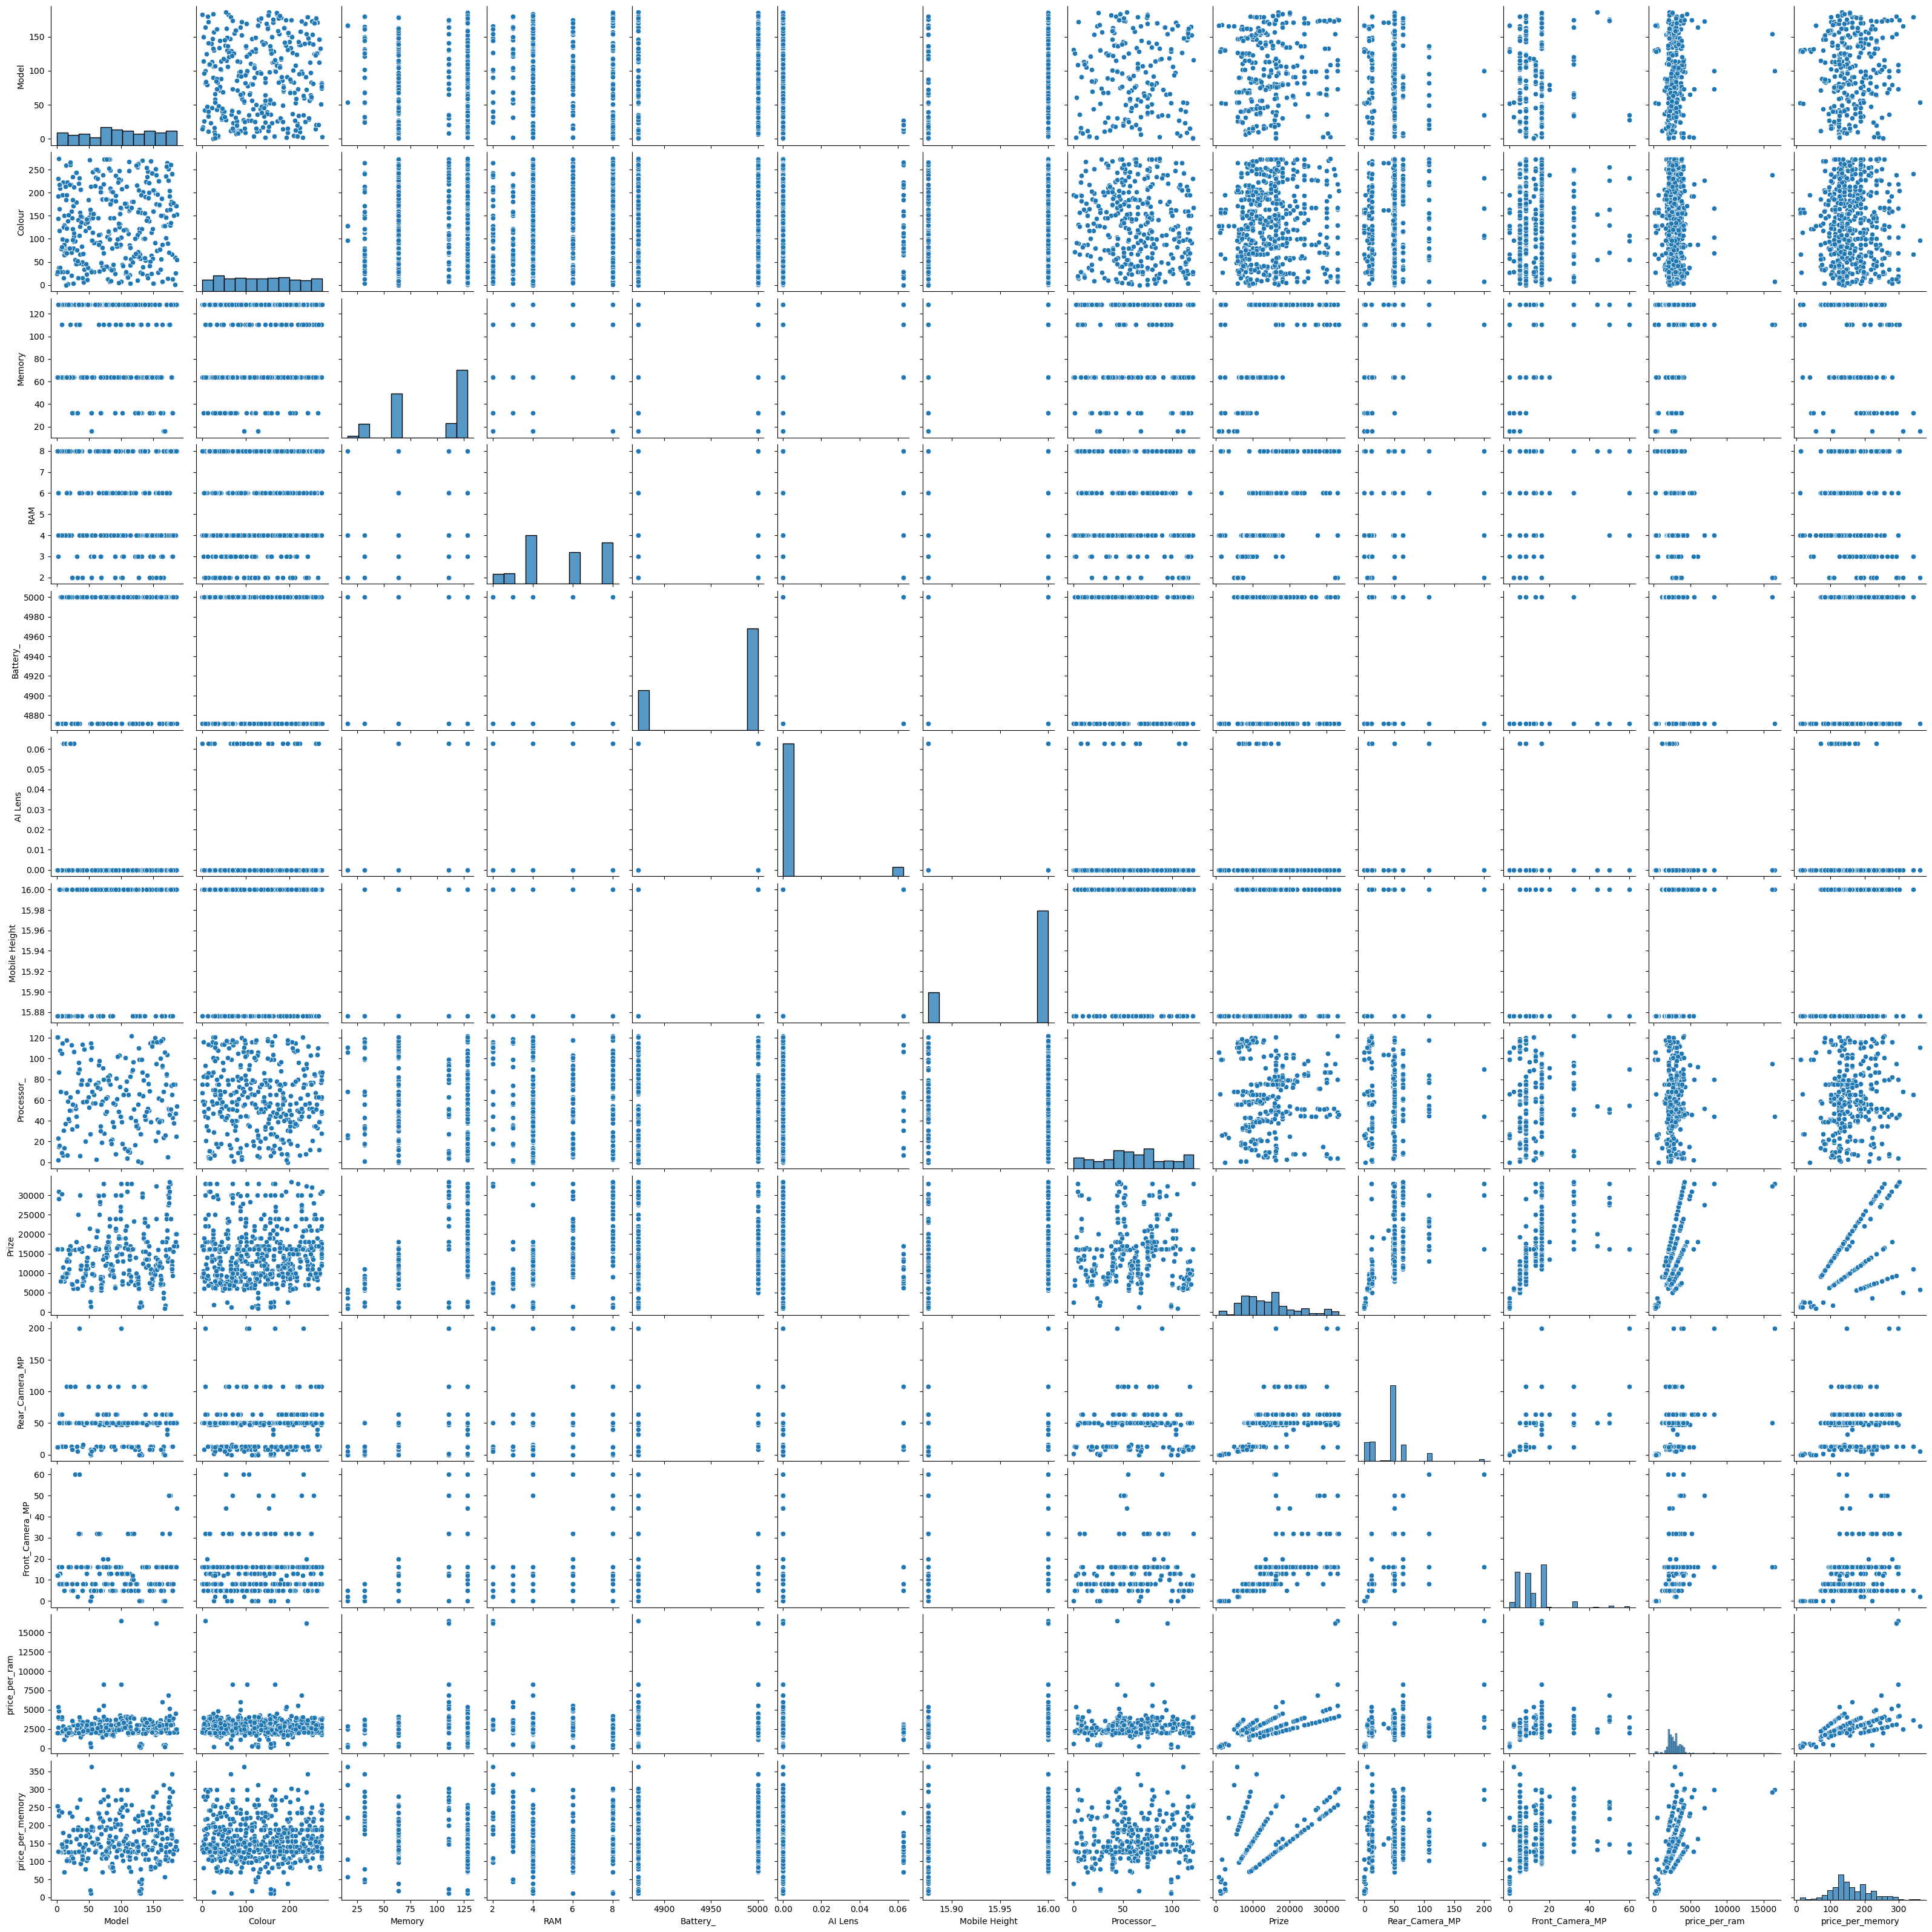

<Figure size 640x480 with 0 Axes>

In [78]:
sns.pairplot(df[['Model','Colour','Memory','RAM','Battery_','AI Lens','Mobile Height','Processor_','Prize','Rear_Camera_MP','Front_Camera_MP','price_per_ram','price_per_memory']])
plt.show()
plt.suptitle('Pairplot: Relationships Between Features and Mobile Prices', y=1.02)
plt.show()

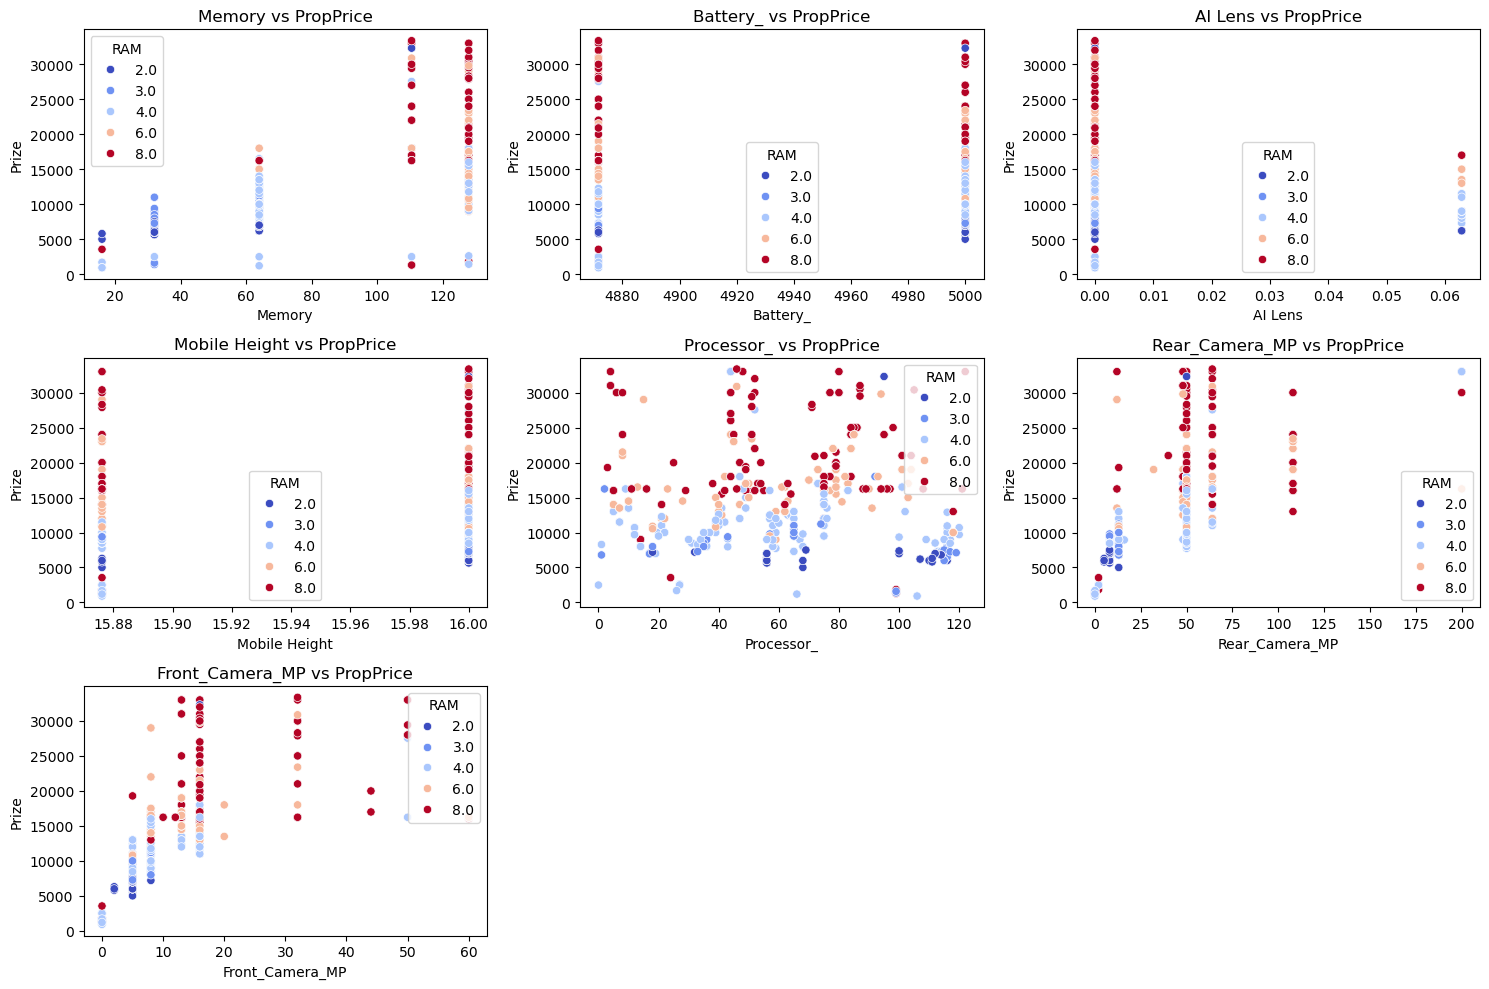

In [79]:
plt.figure(figsize=(15, 10))
features = ['Memory','Battery_','AI Lens','Mobile Height','Processor_','Rear_Camera_MP','Front_Camera_MP']
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=col, y='Prize', hue='RAM',palette='coolwarm')
    plt.title(f'{col} vs PropPrice')
plt.tight_layout()
plt.show()

## Key Insights from the Scatter Plots:

### 1.Memory vs. Prize

#### **More memory (RAM) generally correlates with higher prices.**
#### **Indicating that other factors also influence pricing.**

### 2.Battery vs. Prize

#### **Larger battery capacities generally lead to higher-priced models.**
#### **The spread of data suggests battery capacity alone is not the strongest predictor of price.**

### 3.AI Lens vs. Prize

#### **If AI Lens refers to AI-powered cameras, phones with AI enhancements might be priced higher.**

### 4.Mobile Height vs. Prize

#### **Height (or size) of the phone doesn’t show a strong correlation with price.**

### **Processor vs. Prize**

#### **A more powerful processor is generally associated with higher prices.**

### 5.Rear Camera MP vs. Prize

#### **More megapixels in the rear camera can indicate a higher price, but the correlation is not always strong.**
#### **Other camera-related factors like sensor size, aperture, and additional features (like optical zoom) likely influence pricing.**

### 6.Front Camera MP vs. Prize
#### **Higher front camera megapixels may lead to higher prices but with a weaker correlation than the rear camera.**
#### **Flagship phones prioritize camera quality, but software processing (like HDR and AI beautification) can be more important than megapixels alone.**

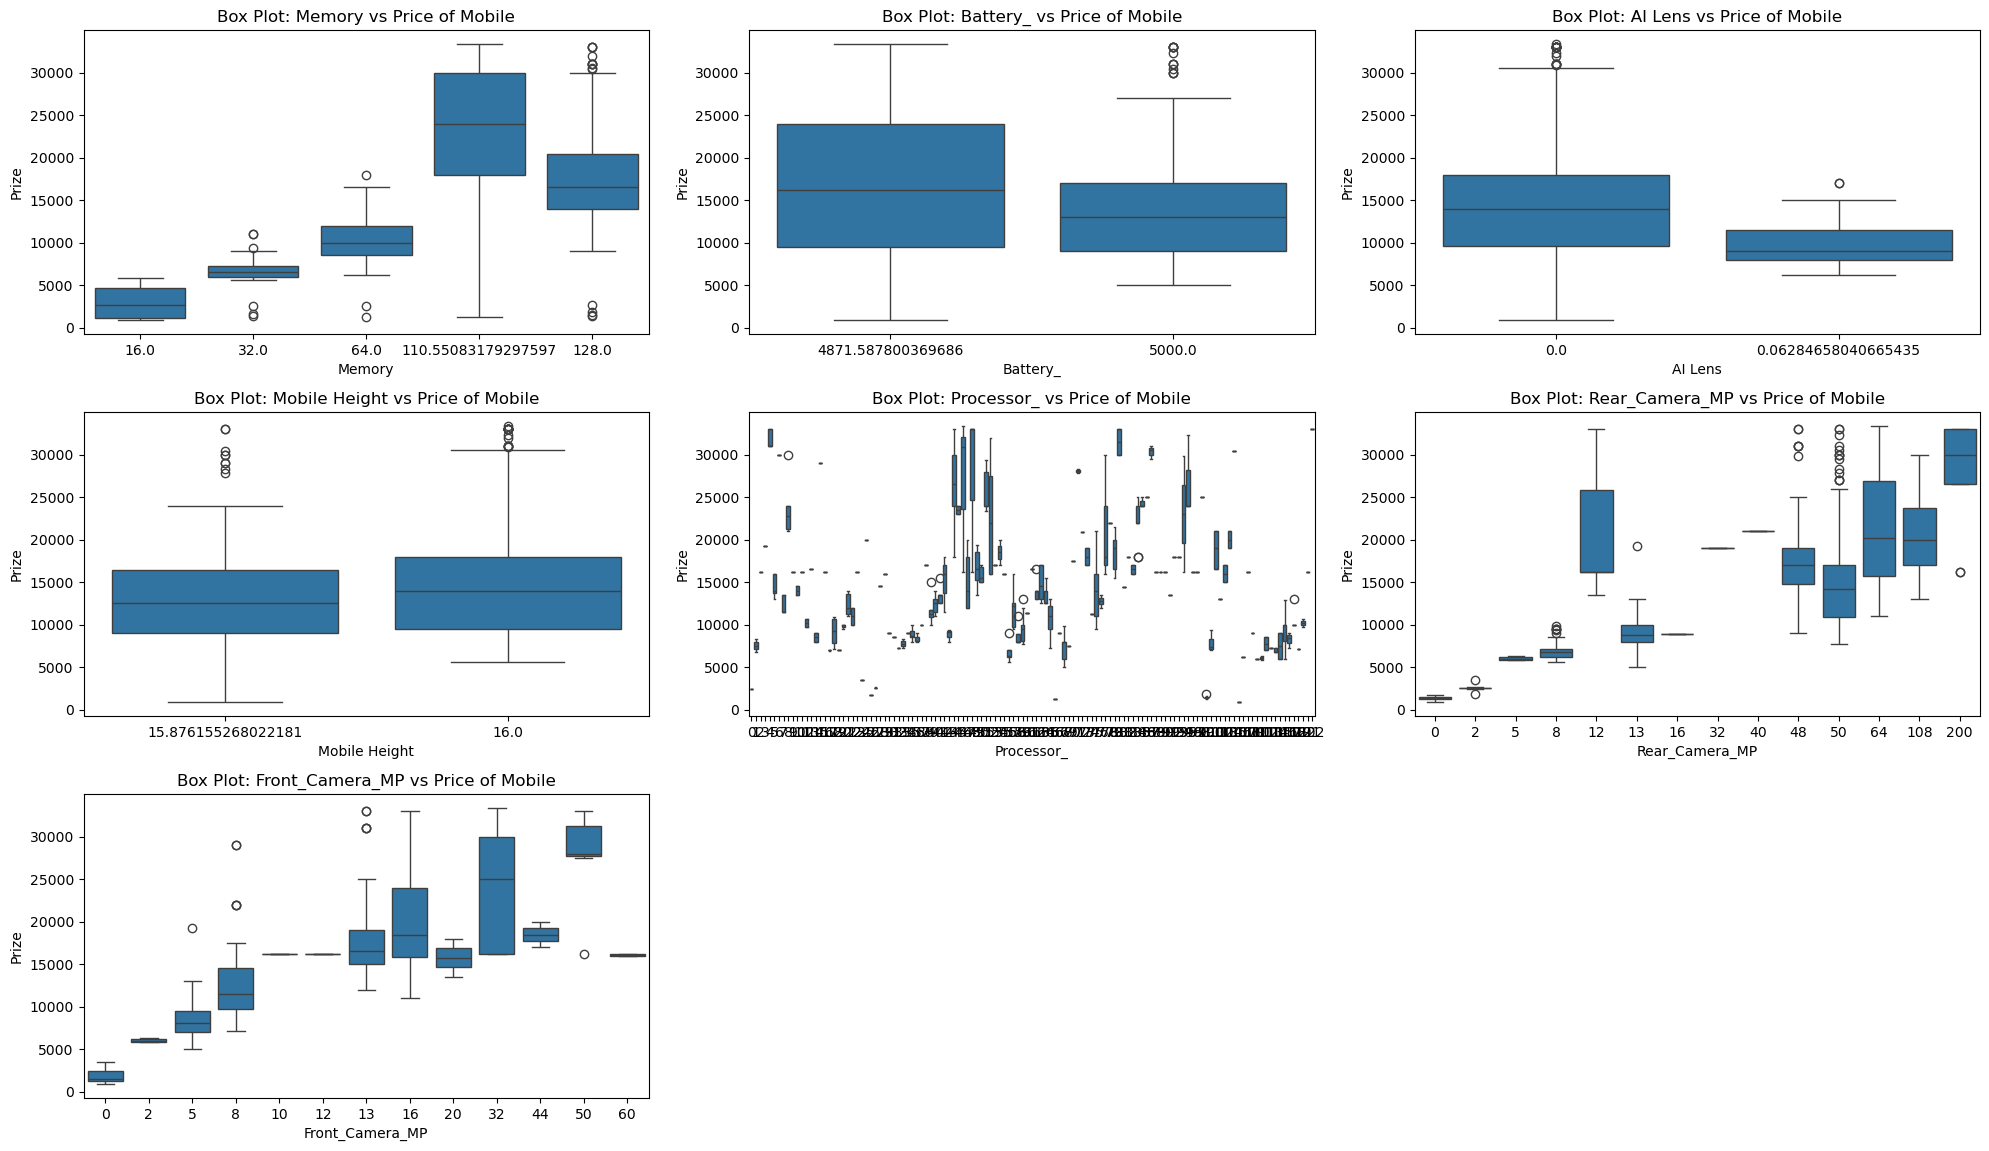

In [81]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(['Memory','Battery_','AI Lens','Mobile Height','Processor_','Rear_Camera_MP','Front_Camera_MP'], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], y=df['Prize'])  # Box plot of feature vs SalePrice
    plt.title(f"Box Plot: {col} vs Price of Mobile")

plt.tight_layout()
plt.show()

## Key Insights from the Boxplots:

### 1.Memory vs. Price

#### **Higher memory (RAM) correlates with higher mobile prices.**
#### **A significant jump in price is observed for models with 128GB RAM.**
#### **Some outliers exist for lower RAM values, likely premium budget phones.**

### 2.Battery vs. Price

#### **No strong direct correlation between battery capacity and price.**
#### **High variance in price for similar battery capacities suggests other influencing factors.**
#### **Some lower-end models with large batteries exist, likely budget gaming phones.**

### 3.AI Lens vs. Price

#### **Limited data points for AI Lens.**
#### **No clear pattern in pricing based on AI Lens presence.**
#### **This feature may not significantly impact mobile pricing.**

### 4.Mobile Height vs. Price

#### **Slightly increasing trend, but no strong impact on price.**
#### **Taller phones might be premium models, but not a decisive factor.**

### 5.Processor vs. Price

#### **Higher variance in price for different processors.**
#### **Some specific processors are associated with high-end models.**
#### **Premium phones tend to use flagship processors.**

### 6.Rear Camera MP vs. Price

#### **Higher MP cameras generally come with higher price tags.**
#### **Some high-MP budget phones exist, but flagship models dominate at the top.**

### 7.Front Camera MP vs. Price

#### **Increasing MP generally increases price but with some overlap.**
#### **Many high-end phones offer high-MP front cameras.**
#### **Some budget models with good front cameras exist, targeting selfie-focused users.**

<Axes: ylabel='Count'>

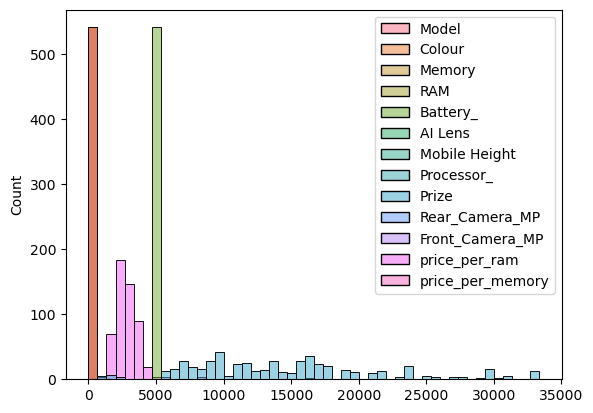

In [83]:
sns.histplot(df,bins=50)

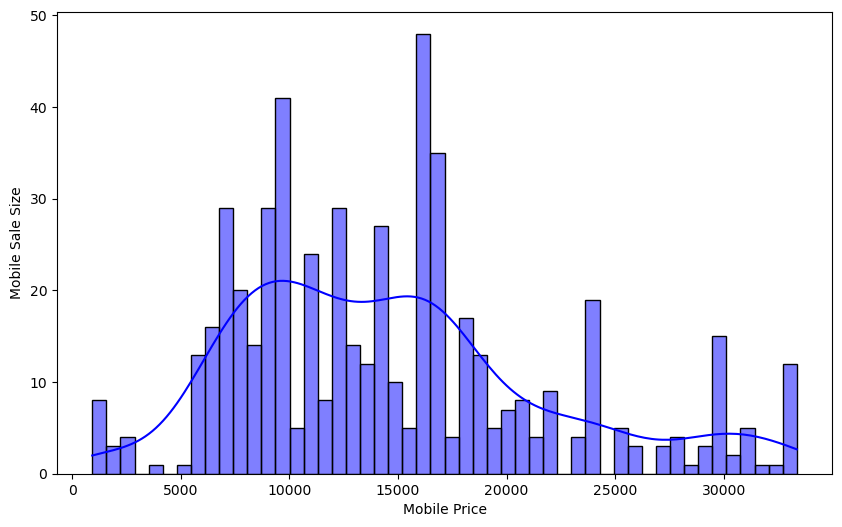

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Prize'], bins=50, kde=True, color='blue')
#plt.title('Mobile price on Size of the Property')
plt.xlabel('Mobile Price')
plt.ylabel('Mobile Sale Size')
plt.show()

## Key Insights from the Histogram:

### This histogram visualizes the distribution of mobile phone prices and their corresponding sales size.

### 1. Price Distribution:
####  The distribution is right-skewed, meaning most phones are priced between 5,000 to 20,000, with fewer phones in the higher price range.
####  There are some outliers in the higher price range (above 25,000–30,000), but they are less frequent.

### 2. Demand vs. Price:
####  The highest concentration of sales occurs around 10,000–15,000, indicating that mid-range phones are the most popular.
####  Expensive phones (>25,000) have lower sales, suggesting that premium phones are sold less frequently.

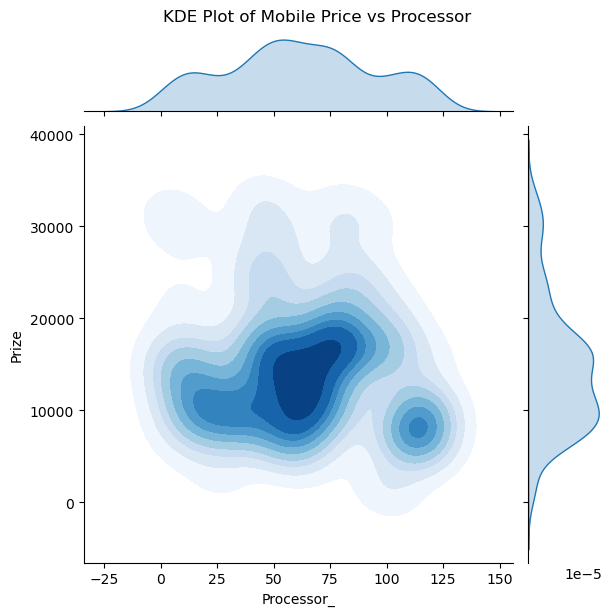

In [86]:
sns.jointplot(x='Processor_', y='Prize', data=df, kind='kde', fill=True, cmap='Blues')

# Set the title for the plot
plt.suptitle('KDE Plot of Mobile Price vs Processor', y=1.02)
plt.show()


## Key Insights from the KDE Plot (Processor vs Mobile Price)

#### **1.High-Density Areas:**
The darkest regions indicate the highest concentration of data points, meaning most mobile phones are priced within 10,000 - 20,000 and have processor values within 0 - 75 (scaled values).
This suggests that the majority of mobile phones are in the mid-range price category.

#### **2.Price-Processor Relationship:**
As the processor value increases, there is a gradual spread in price, but high-end prices (>30,000) are less frequent.
Some high-end processors correlate with higher prices, but they are not as densely populated in the dataset.

#### **3.Bimodal or Skewed Distribution:**
The contours show multiple density peaks, meaning there are multiple segments in the market (low-end, mid-range, high-end).
The KDE plot also suggests that processor values have a skewed distribution, meaning a large number of devices fall within a specific range rather than being evenly spread.

In [88]:
correlation_matrix = df.corr()

In [89]:
correlation_with_saleprice = correlation_matrix['Prize'].sort_values(ascending=False)

In [90]:
correlation_matrix.round(2)

,Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Prize,Rear_Camera_MP,Front_Camera_MP,price_per_ram,price_per_memory
Model,1.00,0.11,0.08,0.01,0.02,-0.40,0.17,0.04,0.11,0.00,0.05,0.11,0.09
Colour,0.11,1.00,0.08,0.06,-0.06,-0.03,0.02,-0.07,0.06,0.05,0.04,0.00,-0.03
Memory,0.08,0.08,1.00,0.73,-0.12,-0.11,0.02,-0.16,0.63,0.47,0.43,0.11,-0.29
RAM,0.01,0.06,0.73,1.00,-0.17,-0.08,-0.11,-0.11,0.66,0.44,0.49,-0.16,0.01
Battery_,0.02,-0.06,-0.12,-0.17,1.00,-0.02,0.29,0.05,-0.18,-0.06,-0.28,-0.03,-0.03
AI Lens,-0.40,-0.03,-0.11,-0.08,-0.02,1.00,-0.13,-0.11,-0.18,-0.04,-0.11,-0.12,-0.14
Mobile Height,0.17,0.02,0.02,-0.11,0.29,-0.13,1.00,0.01,0.09,-0.05,-0.00,0.21,0.13
Processor_,0.04,-0.07,-0.16,-0.11,0.05,-0.11,0.01,1.00,-0.09,-0.10,-0.04,0.00,0.05
Prize,0.11,0.06,0.63,0.66,-0.18,-0.18,0.09,-0.09,1.00,0.59,0.62,0.54,0.50
Rear_Camera_MP,0.00,0.05,0.47,0.44,-0.06,-0.04,-0.05,-0.10,0.59,1.00,0.51,0.34,0.20


## Key Insights from the Correlation Table:
### This table presents the correlation values between different mobile phone features and the target variable (Price).

#### 1. Strongest Correlations with Price:
#####  RAM (0.66): The most significant factor affecting price. Higher RAM typically leads to a more expensive phone.
#####  Memory (0.63): Internal storage also has a strong positive correlation with price.
#####  Processor (0.50): A better processor contributes to higher pricing.
#####  Rear Camera MP (0.59) & Front Camera MP (0.51): Both camera specifications show moderate correlation with price.
#####  Price per RAM & Price per Memory (~0.54): These variables also show strong correlations.

#### 2. Weak or Negative Correlations:
#####  Battery (-0.02): Minimal impact on price.
#####  AI Lens (-0.18): Weak negative correlation, indicating that AI Lens does not strongly determine price.
#####  Mobile Height (0.10): Almost no impact on price.

## Model Building

In [93]:
x=df.drop('Prize',axis=1)
y=df.Prize

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [95]:
x

,Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Rear_Camera_MP,Front_Camera_MP,price_per_ram,price_per_memory
0,23,159,64.000000,4.0,4871.5878,0.062847,16.000000,113,13,5,1824.750000,114.046875
1,23,20,64.000000,4.0,4871.5878,0.062847,16.000000,113,13,5,1824.750000,114.046875
2,37,149,128.000000,8.0,5000.0000,0.000000,16.000000,75,50,16,1499.875000,93.742188
3,69,201,32.000000,2.0,5000.0000,0.000000,16.000000,56,8,5,2824.500000,176.531250
4,12,130,128.000000,8.0,5000.0000,0.062847,16.000000,14,50,5,1124.875000,70.304688
...,...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,110.550832,8.0,4871.5878,0.000000,15.876155,89,50,12,2028.546904,146.795596
537,32,52,32.000000,2.0,4871.5878,0.000000,15.876155,68,5,2,2999.000000,187.437500
538,123,259,64.000000,4.0,5000.0000,0.000000,16.000000,35,50,8,2497.500000,156.093750
539,110,17,128.000000,8.0,5000.0000,0.000000,16.000000,11,50,32,2028.546904,126.784181


In [96]:
y

0       7299.000000
1       7299.000000
2      11999.000000
3       5649.000000
4       8999.000000
           ...     
536    16228.375231
537     5998.000000
538     9990.000000
539    16228.375231
540    15999.000000
Name: Prize, Length: 541, dtype: float64

## Applying Different Models

# 1.Linear Regression

In [99]:
###Creating Linear-Regression Model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

score = model1.score(x_test, y_test)
print(f'Model Score: {score}')

Model Score: 0.9421252305652658


In [100]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("\n📌 Model: Linear Regression")
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('Mean Absolute Error:', mae)


📌 Model: Linear Regression
Mean Squared Error: 2754662.998924544
R-squared: 0.9421252305652658
Mean Absolute Error: 1166.697600498824


# 2.Decision Tree

In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Decision Tree
model2 = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=4, ccp_alpha=0.0)

# Train with raw data (NO SCALING)
model2.fit(x_train, y_train)

# Predictions (Use raw data)
y_pred_train = model2.predict(x_train)  
y_pred_test = model2.predict(x_test)  

# Performance Metrics
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Display results
print("\n📌 Model: Decision Tree")
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)


📌 Model: Decision Tree
Mean Squared Error: 510320.7078087286
R-squared: 0.9892782916408536
Mean Absolute Error: 440.5830077949105


# 3.Random Forest

In [104]:
model3 = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

model3.fit(x_train, y_train)

y_pred_train = model3.predict(x_train)  
y_pred_test = model3.predict(x_test)  

# Performance on Training Set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Performance Metrics
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

print("\n📌 Model: Random Forest")
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Mean Absolute Error:', mae)


📌 Model: Random Forest
Mean Squared Error: 102707.41913280099
R-squared: 0.9978421432299094
Mean Absolute Error: 176.81152110535402


# 4.LASSO

In [106]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [107]:
model4 = Lasso(alpha=0.1, random_state=0)
model4.fit(x_train, y_train)

Lasso(alpha=0.1, random_state=0)

In [108]:
lasso = Lasso(alpha=0.01)  # Example alpha value, adjust based on your needs
lasso.fit(x_train, y_train)

# Use SelectFromModel for feature selection
feature_sel_model = SelectFromModel(lasso, threshold="mean", max_features=10)
x_train_selected = feature_sel_model.transform(x_train)

# List selected features
selected_feat = x_train.columns[feature_sel_model.get_support()]

# Print some stats
print('Total features: {}'.format(x_train.shape[1]))  # Total features in the data
print('Selected features: {}'.format(len(selected_feat)))  # Number of selected features

# Now print how many coefficients are zero
print('Features with coefficients shrank to zero: {}'.format(np.sum(lasso.coef_ == 0))) 

Total features: 12
Selected features: 3
Features with coefficients shrank to zero: 0


In [109]:
model4 = Lasso()

# Train the model
model4.fit(x_train, y_train)

# Predicting values using the trained model
model4_pred = model4.predict(x_test)

# Displaying the predicted values
print('Predicted values (model3_pred):', model4_pred)

Predicted values (model3_pred): [ 7136.78404239  7031.86174208 19910.96305426 10169.65169646
 12788.57552652 14971.78461735  9010.96232166 17592.75050211
 26765.83085002  8768.95162756 12617.24217221 28389.32242647
 19911.45718013 17571.20557199 31970.12222666 16716.27078296
 10221.26168393 17606.95045529 23192.95506109 18689.80138844
  5273.59500955 18817.52347934  8911.14889465 17752.95330084
 26264.03868709 14912.74865841 10866.71851373 22654.35975805
  8424.79663852  6458.05127909 17071.49056858 16722.64091915
 -2333.71414224 17689.61712029 18561.41512463 16078.9016246
 10301.27378326 16289.71260751 16746.90658728  7896.95419611
 13876.65321349 18371.88762145 22825.63696274 13085.46226387
  6263.70007016 15593.42002729 17771.1590583  11059.76350675
  8928.45439995  7393.63764813 16203.84432974 28366.53628456
  9530.89274648  6549.61608678  6751.85932359 20680.70965345
 19989.44274517 26968.5084287  12164.46316355 13194.09325059
 11766.94090645 24190.61449527  6728.0739999  16913.37

In [110]:
print("\n📌 Model: Lasso")
# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, model4_pred)
print('Mean Squared Error:', mse)

# Calculate and print the R-squared score
r2 = r2_score(y_test, model4_pred)
print('R-squared:', r2)

mae = mean_absolute_error(y_test, model4_pred)
print('Mean Absolute Error:', mae)



📌 Model: Lasso
Mean Squared Error: 2725852.4231431726
R-squared: 0.9427305334394394
Mean Absolute Error: 1170.3574706384923


# 5.SVR

In [112]:
# Feature Scaling (Essential for SVR)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [113]:
from sklearn.svm import SVR

model5= SVR()

# Train SVM Regressor
model5 = SVR(kernel='rbf',degree=3, C=2000, gamma=0.01, epsilon=0.2)
model5.fit(x_train_scaled, y_train)


SVR(C=2000, epsilon=0.2, gamma=0.01)

In [114]:
# Predictions (Use Scaled Data)
y_pred_train = model5.predict(x_train_scaled)  # FIXED
y_pred_test = model5.predict(x_test_scaled)    # FIXED

# Performance Metrics
mse = mean_squared_error(y_test, y_pred_test)  # Use y_pred_test instead of model5_pred
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Display results
print("\n📌 Model: SVR")
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Mean Absolute Error:', mae)



📌 Model: SVR
Mean Squared Error: 1748859.5084078754
R-squared: 0.963256906248654
Mean Absolute Error: 827.9168807783578


# 6.KNN

In [116]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [117]:
model6 = KNeighborsRegressor(n_neighbors=3, weights='distance', p=1)
model6.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')

In [118]:

y_pred_train = model6.predict(x_train_scaled)
y_pred_test = model6.predict(x_test_scaled) 

# Performance Metrics
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Display results
print("\n📌 Model: KNN")
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Mean Absolute Error:', mae)


📌 Model: KNN
Mean Squared Error: 1526239.1362709783
R-squared: 0.9679341036822159
Mean Absolute Error: 603.1397106750409


# 7.Gradient Booster

In [120]:
model7=GradientBoostingRegressor(n_estimators=350,learning_rate=0.02,max_depth=4,min_samples_split=15,min_samples_leaf=5,subsample=0.75,random_state=42)
# Train the model
model7.fit(x_train, y_train)

# Predict
model7_pred = model7.predict(x_test)

In [121]:
# Performance Metrics
mse = mean_squared_error(y_test, model7_pred)
r2 = r2_score(y_test, model7_pred)
mae = mean_absolute_error(y_test, model7_pred)

# Display results
print("\n📌 Model: Gradient Booster")
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Mean Absolute Error:', mae)


📌 Model: Gradient Booster
Mean Squared Error: 165450.20113660357
R-squared: 0.9965239333277974
Mean Absolute Error: 273.325746911811


# Comparing MAE and RMSE of all the models For final selection of Model

In [123]:
# Store model results in a list of dictionaries
models_results = [
    {"Model": "Linear Regression", "MSE": 352691.44213661394, "R2": 0.9925900424468512, "MAE":337.41661964168964},
    {"Model": "Decision Tree", "MSE": 510320.7078087286, "R2": 0.9892782916408536, "MAE":440.5830077949105},
    {"Model": "Random Forest", "MSE": 102707.41913280099, "R2": 0.9978421432299094, "MAE": 176.81152110535402},
    {"Model": "Lasso Regression", "MSE": 2725852.4231431726, "R2": 0.9427305334394394, "MAE":1170.3574706384923},
    {"Model": "SVR", "MSE":1748859.5084078754, "R2":0.963256906248654, "MAE":827.9168807783578},
    {"Model": "KNN", "MSE":1526239.1362709783, "R2":0.9679341036822159, "MAE": 603.1397106750409},
    {"Model": "Gradient Booster", "MSE":165450.20113660357, "R2":0.9965239333277974, "MAE": 273.325746911811},
]

# Print comparison table
print("\n Model Performance Comparison:\n")
print(f"{'Model':<20} {'MSE':<15} {'R² Score':<15} {'MAE':<15}")
print("=" * 65)
for model in models_results:
    print(f"{model['Model']:<20} {model['MSE']:<15,.2f} {model['R2']:<15.4f} {model['MAE']:<15,.2f}")

# Find the best model based on highest R² Score
best_model = max(models_results, key=lambda x: x["R2"])

# Print Best Model
print("\n Best Model:")
print(f"Model: {best_model['Model']}")
print(f"Mean Squared Error: {best_model['MSE']:.2f}")
print(f"R-squared: {best_model['R2']:.4f}")
print(f"Mean Absolute Error: {best_model['MAE']:.2f}")



 Model Performance Comparison:

Model                MSE             R² Score        MAE            
Linear Regression    352,691.44      0.9926          337.42         
Decision Tree        510,320.71      0.9893          440.58         
Random Forest        102,707.42      0.9978          176.81         
Lasso Regression     2,725,852.42    0.9427          1,170.36       
SVR                  1,748,859.51    0.9633          827.92         
KNN                  1,526,239.14    0.9679          603.14         
Gradient Booster     165,450.20      0.9965          273.33         

 Best Model:
Model: Random Forest
Mean Squared Error: 102707.42
R-squared: 0.9978
Mean Absolute Error: 176.81


## **Model Comparison Insights**

### **Overview of Models and Metrics**




### **Key Insights**

#### **Gradient Booster - The Top Performer**
- **MAE**:  176.81  
- **R^2**: 0.9978 
- **MSE**102707.42  

**Insight of Random Forest** stands out as the best model based on **MAE**, **RMSE**, and **MSE**. It minimizes errors effectively, showing good generalization and stability.  
- The low **MSE** indicates minimal prediction variance, and the low **MAE** suggests that the model makes predictions that are close to the actual values on average.

## Mobile Price Prediction

In [126]:
x_train.shape

(432, 12)

In [127]:
x_test.shape

(109, 12)

In [128]:
y_train.shape

(432,)

In [129]:
y_test.shape

(109,)

In [130]:
x_train.head()

,Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Rear_Camera_MP,Front_Camera_MP,price_per_ram,price_per_memory
244,166,128,16.0,8.0,4871.5878,0.0,15.876155,24,2,0,443.625000,221.812500
540,59,215,128.0,4.0,5000.0000,0.0,16.000000,57,50,8,3999.750000,124.992188
417,4,165,128.0,8.0,4871.5878,0.0,16.000000,16,50,8,2028.546904,126.784181
509,96,5,128.0,6.0,5000.0000,0.0,16.000000,49,50,16,3165.000000,148.359375
353,126,72,64.0,4.0,5000.0000,0.0,16.000000,1,13,5,2072.000000,129.500000


In [131]:
x_test.head()

,Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Rear_Camera_MP,Front_Camera_MP,price_per_ram,price_per_memory
229,11,125,64.0,4.0,4871.5878,0.062847,15.876155,31,13,8,2124.750,132.796875
73,90,119,32.0,2.0,5000.0000,0.000000,16.000000,56,8,5,3149.500,196.843750
352,80,115,128.0,8.0,5000.0000,0.000000,16.000000,79,64,16,2437.375,152.335938
86,153,198,64.0,4.0,5000.0000,0.000000,15.876155,21,64,8,2749.750,171.859375
470,160,77,128.0,4.0,5000.0000,0.000000,16.000000,40,50,8,3149.750,98.429688


In [132]:
y_train.head()

244     3549.000000
540    15999.000000
417    16228.375231
509    18990.000000
353     8288.000000
Name: Prize, dtype: float64

In [133]:
y_test.head()

229     8499.0
73      6299.0
352    19499.0
86     10999.0
470    12599.0
Name: Prize, dtype: float64

In [134]:
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(x_train, y_train)# Train the model on the entire dataset

RandomForestRegressor(random_state=42)

In [135]:
y_pred = final_model.predict(x_test) # Predict on test data
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")  # R² value ranges from 0 to 1, where 1 is the best

Mean Absolute Error (MAE): 186.74
Mean Squared Error (MSE): 113484.53
Root Mean Squared Error (RMSE): 336.87
R² Score: 0.9976


In [136]:
num_features = x_train.shape[1]
# Manually define feature values for prediction (Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Rear_Camera_MP,
#                                                      Front_Camera_MP,price_per_ram,price_per_memory)
mobile_price = np.array([99,228,110.550832,8.0,5000.0000,0.000000,16.000000,44,50,16,3374.875,244.222495])
mobile_price = mobile_price.reshape(1, num_features)# Reshape it to match model input shape (1 sample, num_features)
predicted_price = final_model.predict(mobile_price)# Predict Mobile price
print(f"Predicted Price: ₹{predicted_price[0]:,.2f}")

Predicted Price: ₹26,939.23


## Comparing actual price vs predicted price

In [138]:
# Predict prices on test dataset
y_pred_test = model3.predict(x_test)

# Compare actual vs predicted prices
results = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_pred_test})
print(results.head())  # Show first few rows

     Actual Price  Predicted Price
229        8499.0      8492.272996
73         6299.0      6526.547302
352       19499.0     19358.034722
86        10999.0     11024.578053
470       12599.0     12842.505556


## Customer Prefrences

In [140]:
df.head()

,Model,Colour,Memory,RAM,Battery_,AI Lens,Mobile Height,Processor_,Prize,Rear_Camera_MP,Front_Camera_MP,price_per_ram,price_per_memory
0,23,159,64.0,4.0,4871.5878,0.062847,16.0,113,7299.0,13,5,1824.750,114.046875
1,23,20,64.0,4.0,4871.5878,0.062847,16.0,113,7299.0,13,5,1824.750,114.046875
2,37,149,128.0,8.0,5000.0000,0.000000,16.0,75,11999.0,50,16,1499.875,93.742188
3,69,201,32.0,2.0,5000.0000,0.000000,16.0,56,5649.0,8,5,2824.500,176.531250
4,12,130,128.0,8.0,5000.0000,0.062847,16.0,14,8999.0,50,5,1124.875,70.304688


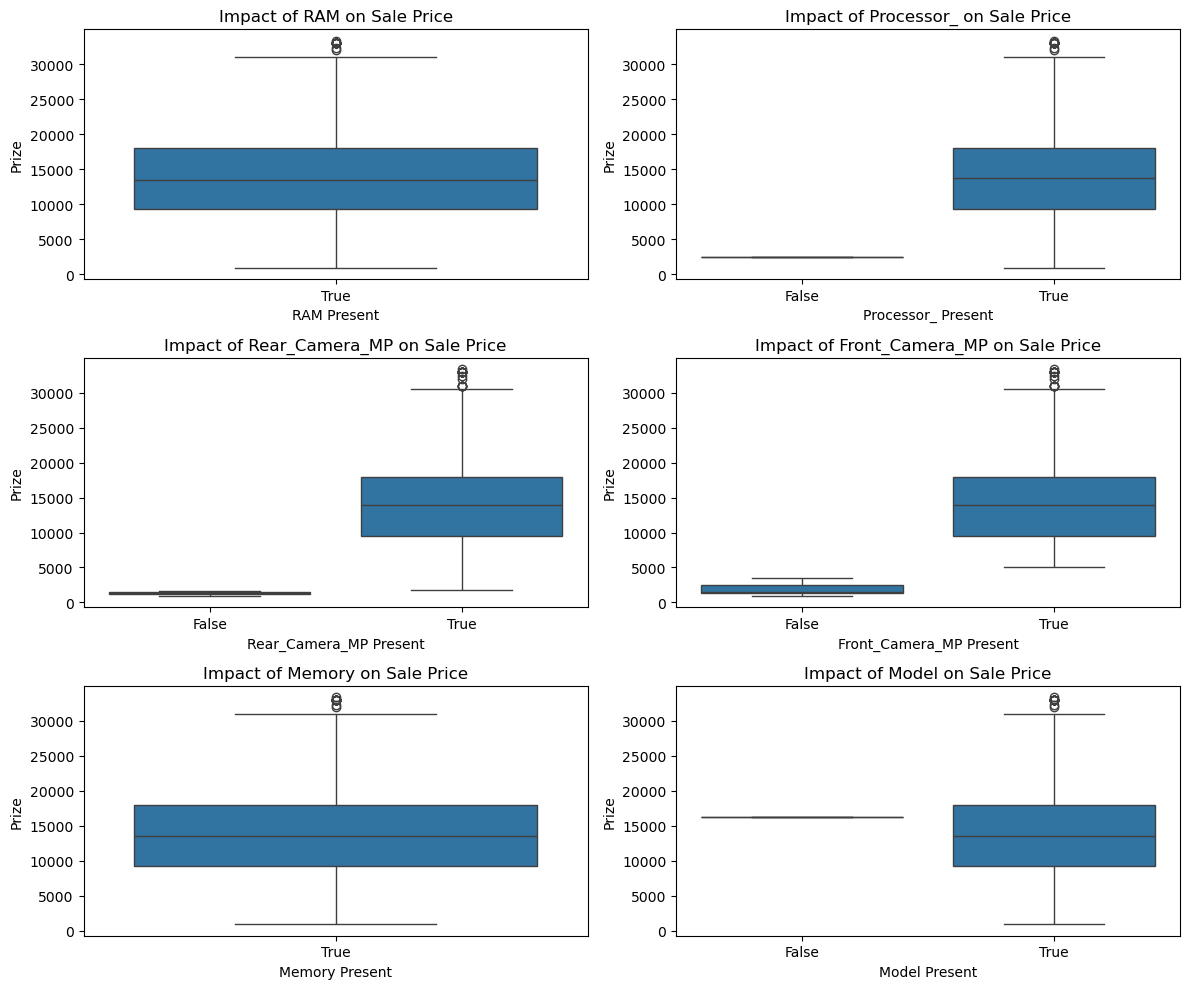

In [141]:
# Selecting key Features to analyze their impact on Mobile prices
Features = ["RAM", "Processor_", "Rear_Camera_MP", "Front_Camera_MP","Memory","Model"]

# Create subplots for visualizing the effect of features
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for ax, Features in zip(axes.flatten(), Features):
    sns.boxplot(x=df[Features] > 0, y=df["Prize"], ax=ax)
    ax.set_xlabel(f"{Features} Present")
    ax.set_ylabel("Prize")
    ax.set_title(f"Impact of {Features} on Sale Price")

plt.tight_layout()
plt.show()


### Key Insights from the Boxplots:

#### **1.RAM Presence vs. Price:**

##### **Phones with RAM tend to have a higher median price than those without.**
##### **The price distribution is wider, indicating greater variation in high-end models.**

#### **Processor Presence vs. Price:**

##### **The presence of a processor correlates with a higher price range.**
##### **Some outliers suggest premium models with expensive processors.**

#### **Rear Camera MP vs. Price:**

##### **Phones with rear cameras tend to be more expensive, but there are also budget models with cameras.**
##### **Outliers indicate flagship models with high camera quality driving up prices.**

#### **Front Camera MP vs. Price:**

##### **Similar to rear cameras, but the price impact seems slightly less pronounced.**
##### **This suggests that rear cameras play a bigger role in price differentiation than front cameras.**

#### **Memory Presence vs. Price:**

##### **Devices with more memory generally have higher prices.**
##### **However, some low-memory budget devices are still present.**

#### **Model Presence vs. Price:**

##### **Certain models have a wide price range, suggesting variability in specs within a model lineup.**
##### **There are outliers, likely representing flagship or premium models.**

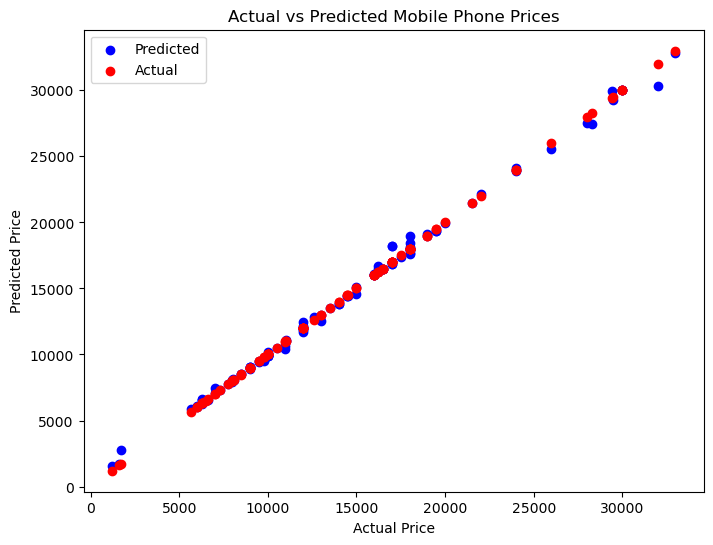

In [143]:
##Model Evaluation
##Step 5.1: Evaluating Model Performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.title('Actual vs Predicted Mobile Phone Prices')
plt.show()

In [203]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [204]:
from IPython.display import FileLink
x_train.to_excel('final_dataset.xlsx', index=False)

# Create a downloadable link for the Excel file
FileLink(r'final_dataset.xlsx')

C:\Users\windows 10\final_dataset.xlsx